In this script I create a manually annotated dataset using the MNIST dataset. In order to prevent that neither the target CNN nor the neural network interpreter have seen the data we use the first 100 images of the MNIST testset. 

Loading all necessary libraries. 

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import pickle
import numpy as np

Let us get a look at the first hundred images of the test set that we want to annotate. 

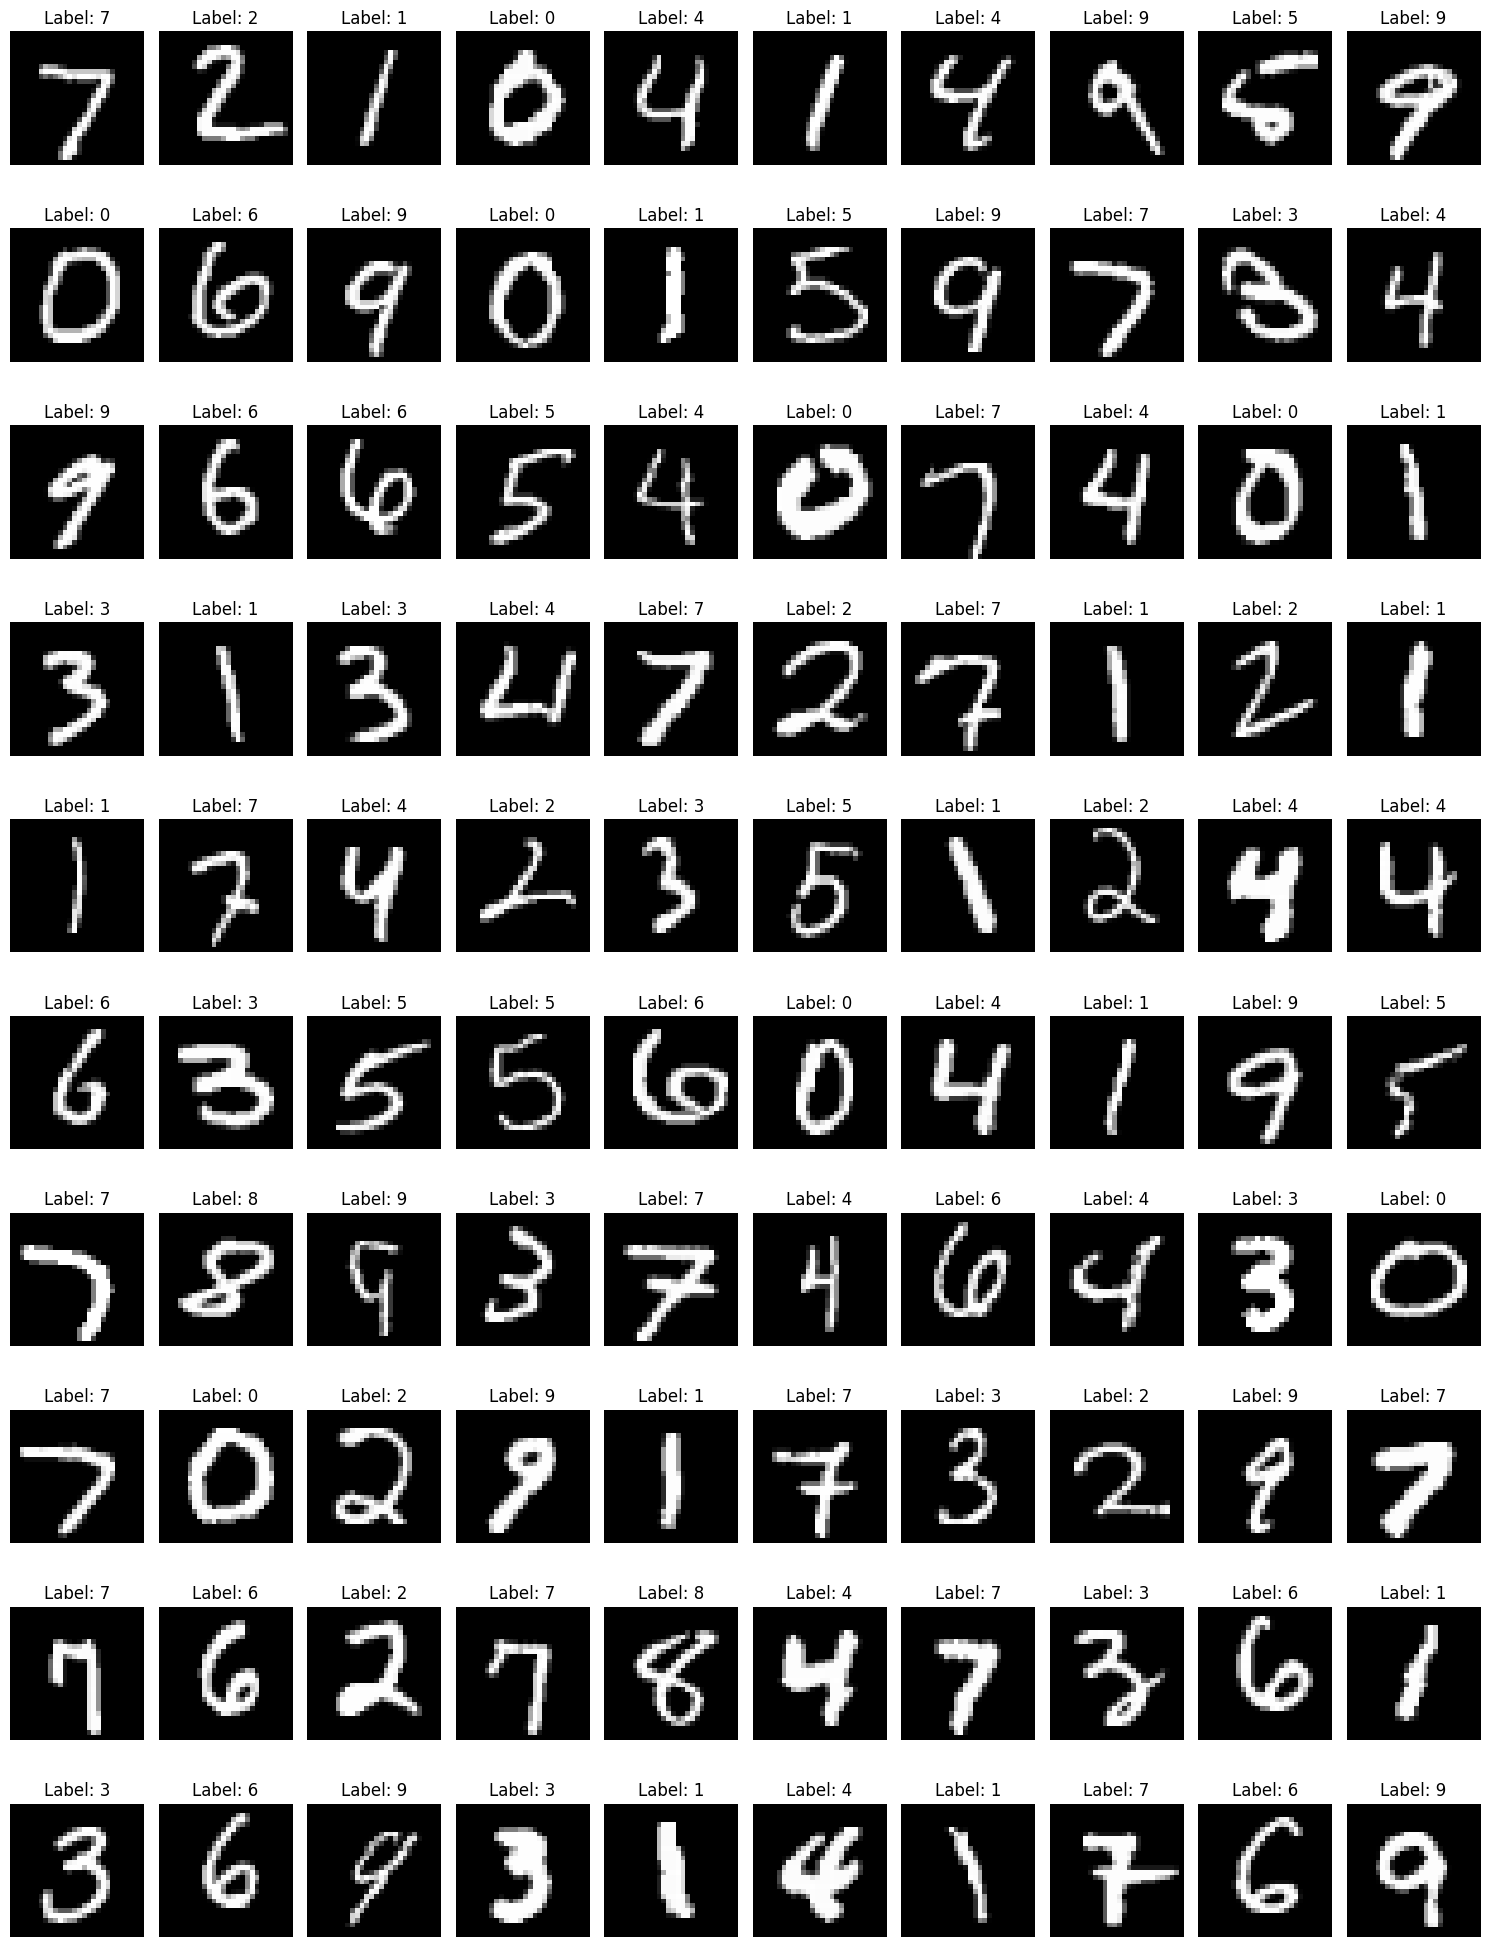

In [1]:
# Load the MNIST test dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor()])
mnist_fine_tune = datasets.MNIST(root='./test', train=False, download=True, transform=transform)

# Extract the first 100 images and their labels
images, labels = zip(*[(image, label) for i, (image, label) in enumerate(mnist_fine_tune) if i < 100])

# Display the images
plt.figure(figsize=(15, 20))  # Adjusted the figure size
for i in range(100):
    plt.subplot(10, 10, i + 1)  # Changed to a 10x10 grid
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


I want to partially automate the annotation process. Thus, I reuse the description generating functions for the synthetic dataset. Note that the function below will display the current MNIST image to annotate and then query the user for all possible number of shapes. The user can comfortably type in the number of observed shapes and even reverse a wrong entry by typing back. The function then genererates a description similar to the description for the synthetic dataset. For illustration, I ran the function for several images and afterwards display the image and the generated description as its title. 

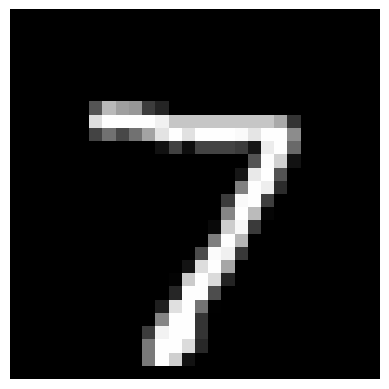

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


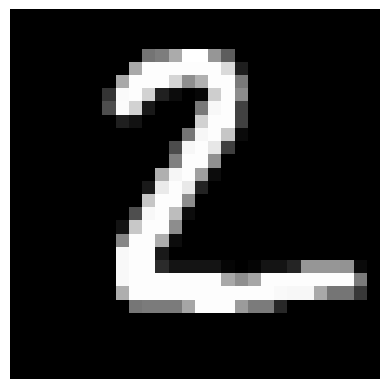

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


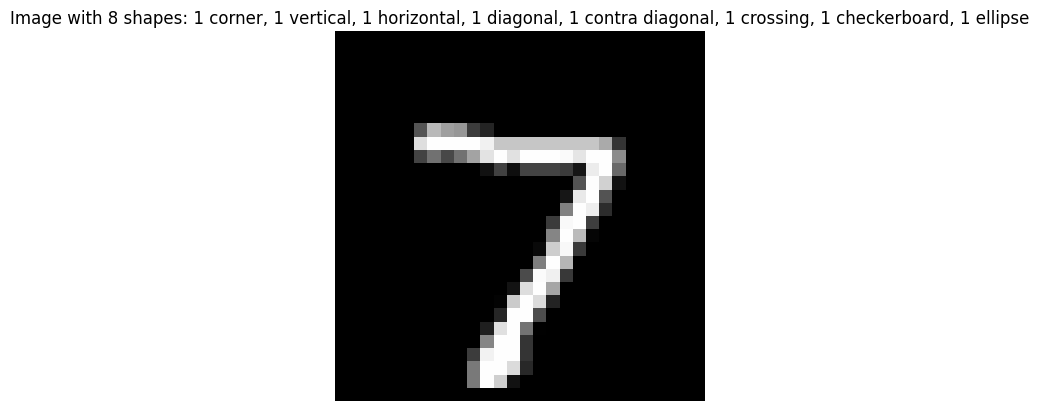

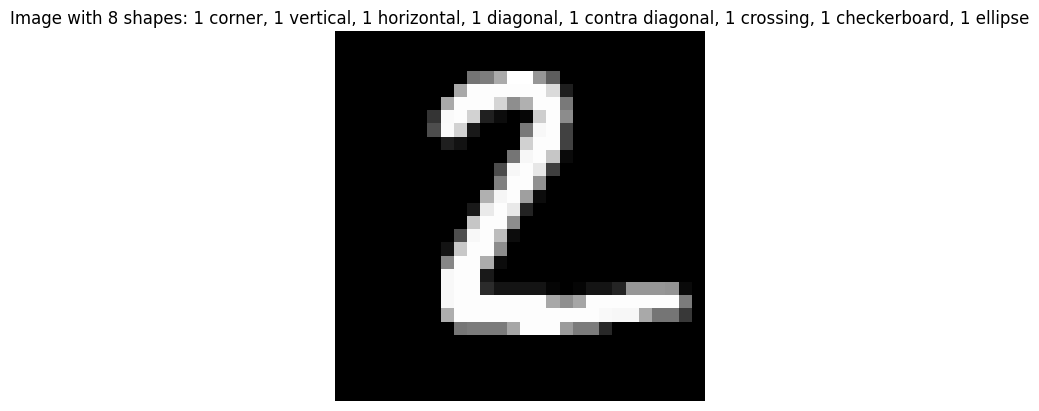

['Image with 8 shapes: 1 corner, 1 vertical, 1 horizontal, 1 diagonal, 1 contra diagonal, 1 crossing, 1 checkerboard, 1 ellipse', 'Image with 8 shapes: 1 corner, 1 vertical, 1 horizontal, 1 diagonal, 1 contra diagonal, 1 crossing, 1 checkerboard, 1 ellipse']


In [16]:
def generate_shape_description(shape_counts):
    # Generate a human-readable description of the shapes
    descriptions = []
    for shape, count in shape_counts.items():
        if count > 0:
            shape_name = shape.split('_')[1]

            # Special handling for 'contra' shape
            if shape_name == 'contra':
                shape_name = 'contra diagonal'

            if count == 1:
                descriptions.append(f"1 {shape_name}")
            else:
                # Add 's' for plural, except for special case
                if shape_name == 'contra diagonal ':
                    descriptions.append(f"{count} {shape_name}")
                else:
                    descriptions.append(f"{count} {shape_name}s")
    return ', '.join(descriptions)

def annotate_mnist_images(images, num_images):
    processed_images = []
    annotations = []

    for i in range(num_images):
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.axis('off')
        plt.show()

        shape_counts = {
            "num_corner": 0,
            "num_vertical": 0,
            "num_horizontal": 0,
            "num_diagonal": 0,
            "num_contra_diagonal": 0,
            "num_crossing": 0,
            "num_checkerboard": 0,
            "num_ellipse": 0
        }

        shapes = list(shape_counts.keys())
        index = 0
        while index < len(shapes):
            shape = shapes[index]
            try:
                count_input = input(f"Enter count for {shape} (or type 'back' to revise previous): ")
                if count_input.lower() == 'back':
                    if index > 0:
                        index -= 1  # Go back to previous shape
                    continue
                count = int(count_input)
                shape_counts[shape] = count
                index += 1  # Move to next shape
            except ValueError:
                print("Invalid input. Please enter a valid integer.")
                # The loop will repeat for the same shape due to no increment in index

        shape_description = generate_shape_description(shape_counts)
        total_shapes = sum(shape_counts.values())
        shape_description = f"Image with {total_shapes} shape{'s' if total_shapes > 1 else ''}: {shape_description}"
        processed_images.append(images[i])
        annotations.append(shape_description)

    return processed_images, annotations

# Example usage
mnist_images, mnist_annotations = annotate_mnist_images(images, 2)

for img, annotation in zip(mnist_images, mnist_annotations):
    plt.imshow(img.numpy().squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"{annotation}")
    plt.show()



Here, I will do the very booring task of annotating 100 MNIST images. Every 20 images I will display the generated descriptions and the images to make shure that everything is going well. 

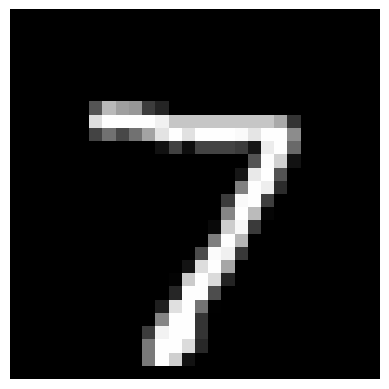

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


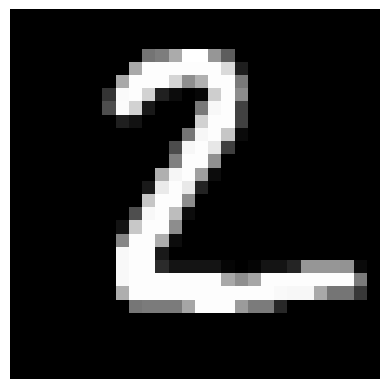

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


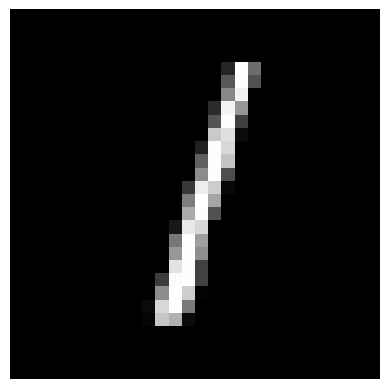

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  back
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


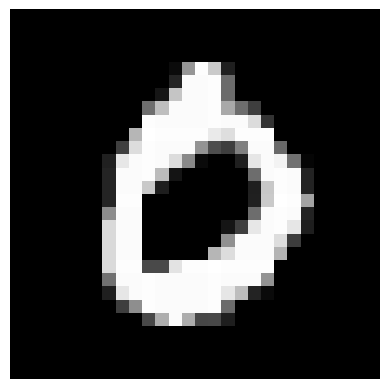

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  1


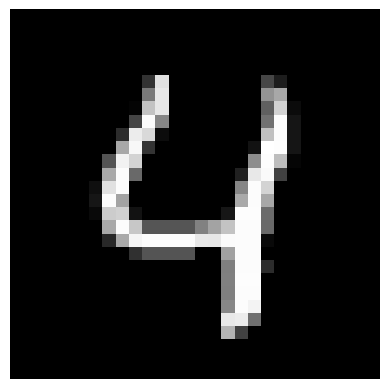

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


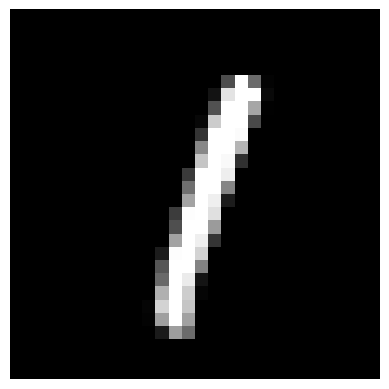

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


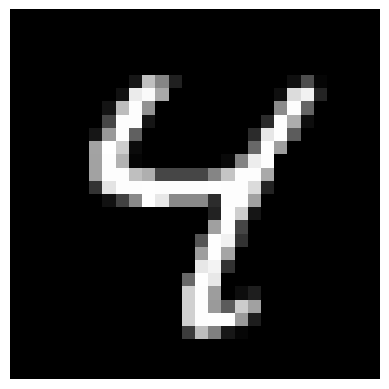

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


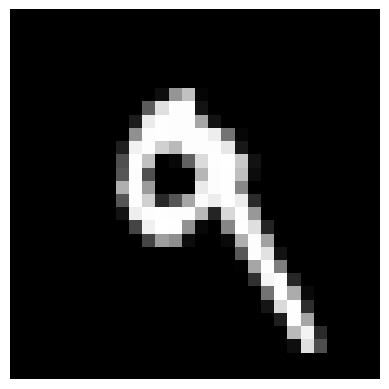

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  3
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  2


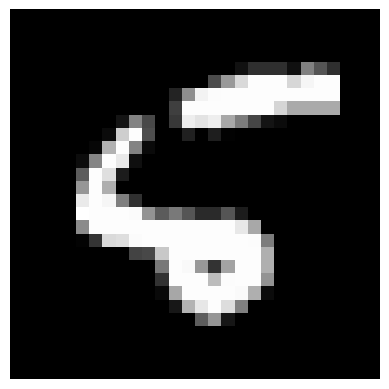

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  1


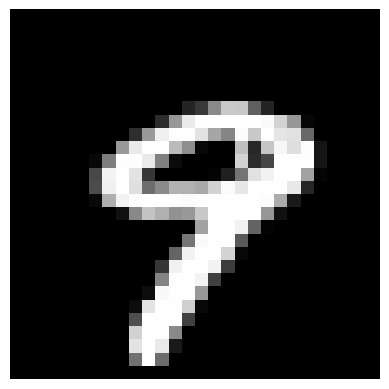

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


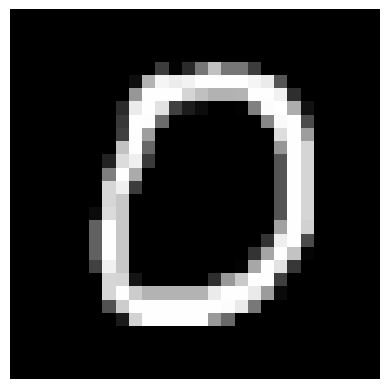

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  back
Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  3


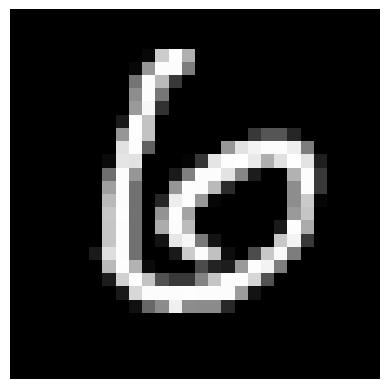

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  2


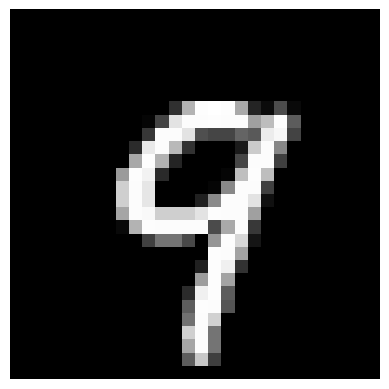

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


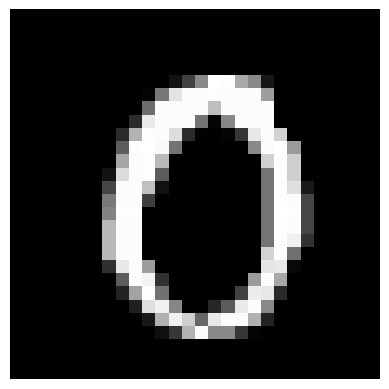

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  2


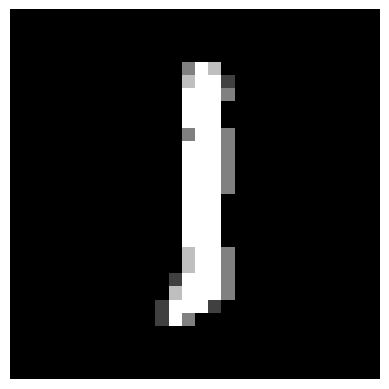

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


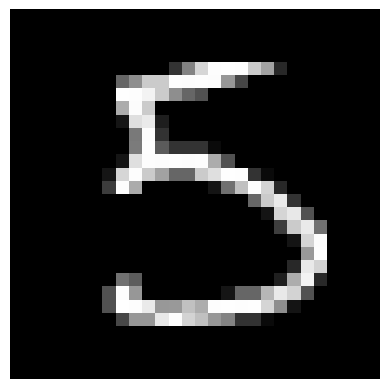

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  3


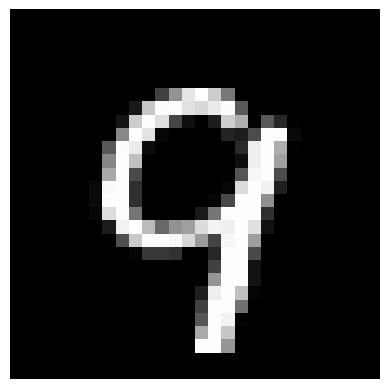

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


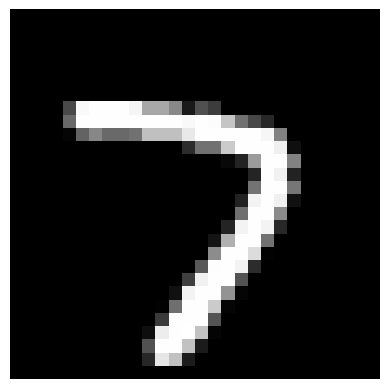

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  1


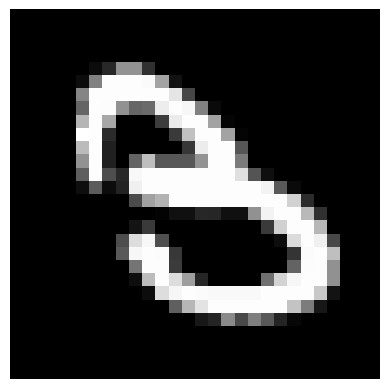

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  3
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  3


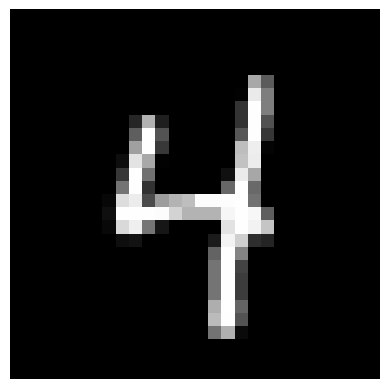

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  0


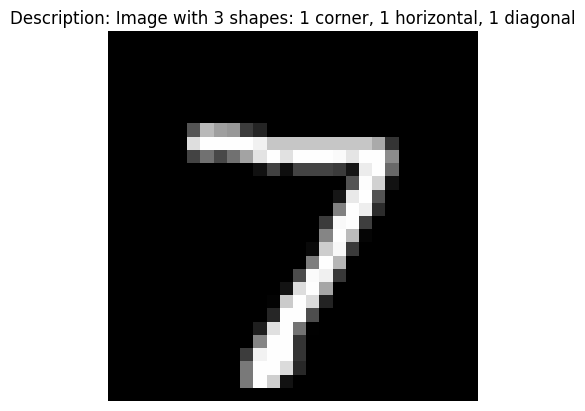

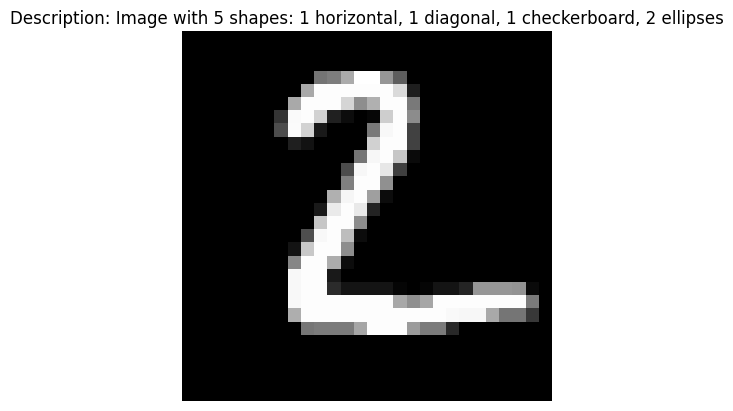

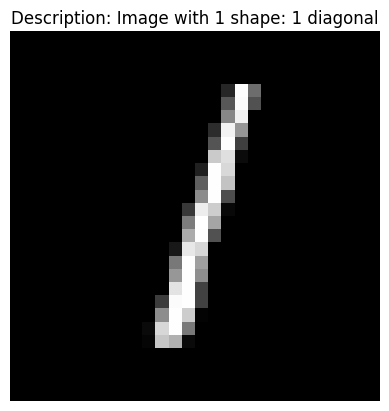

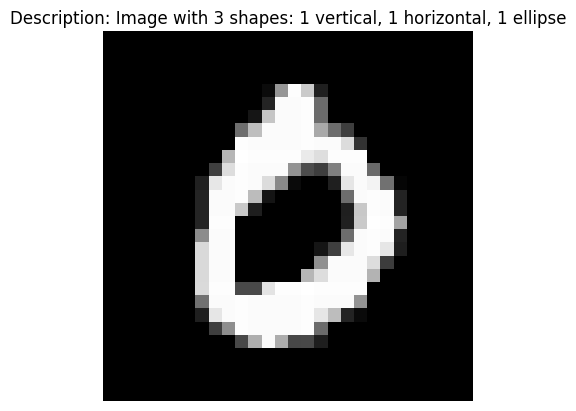

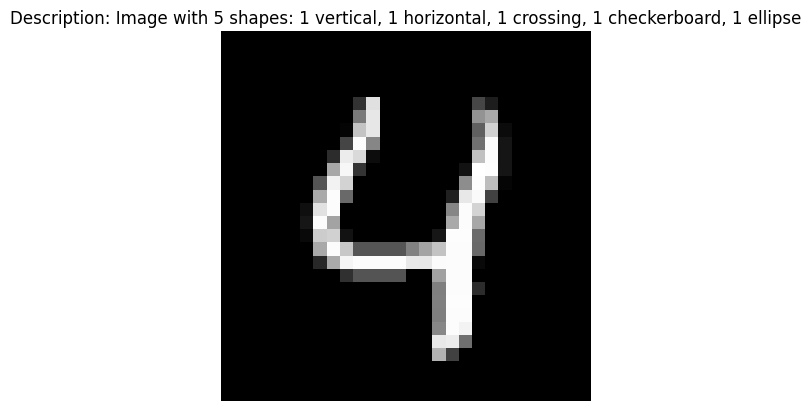

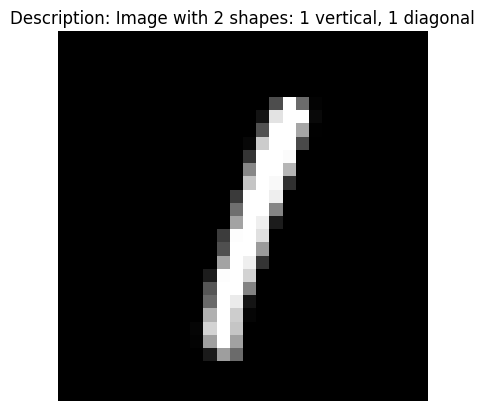

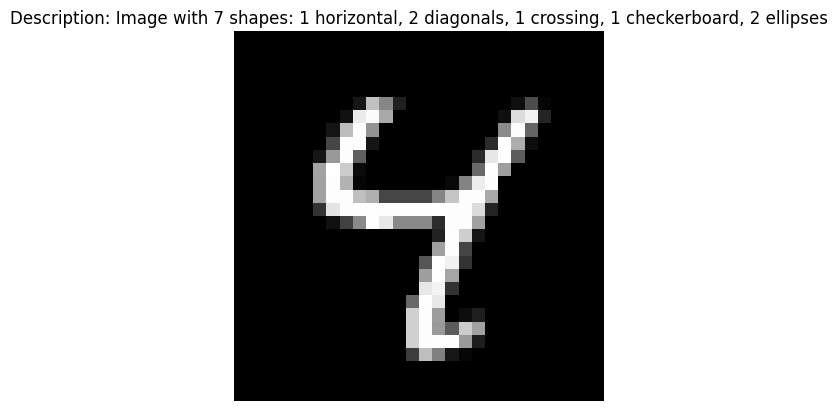

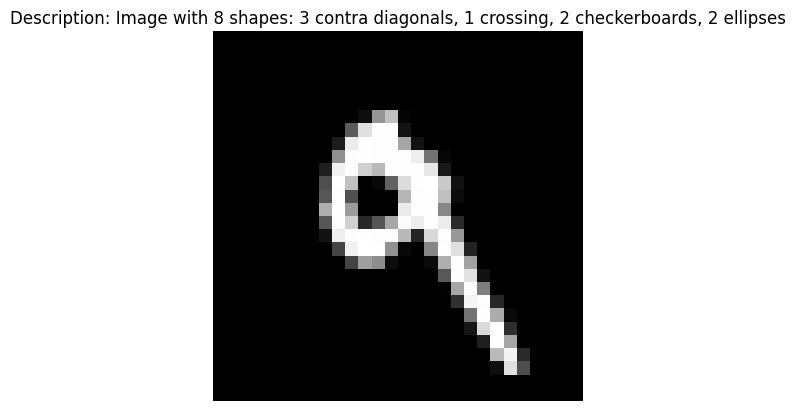

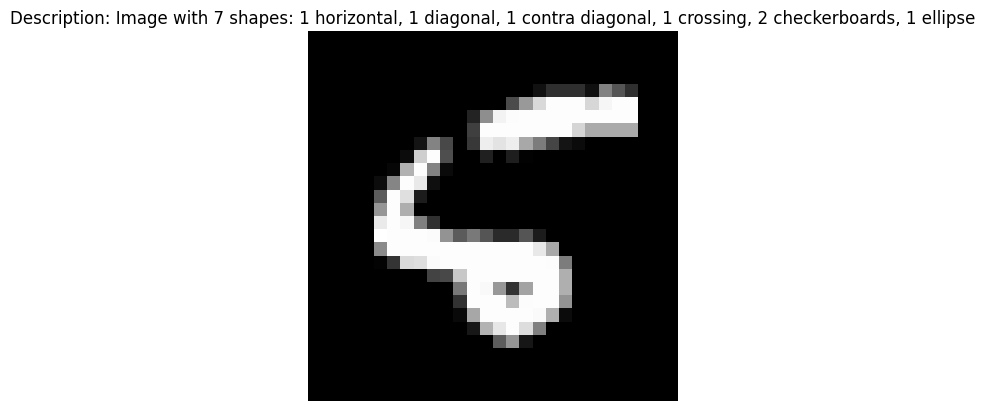

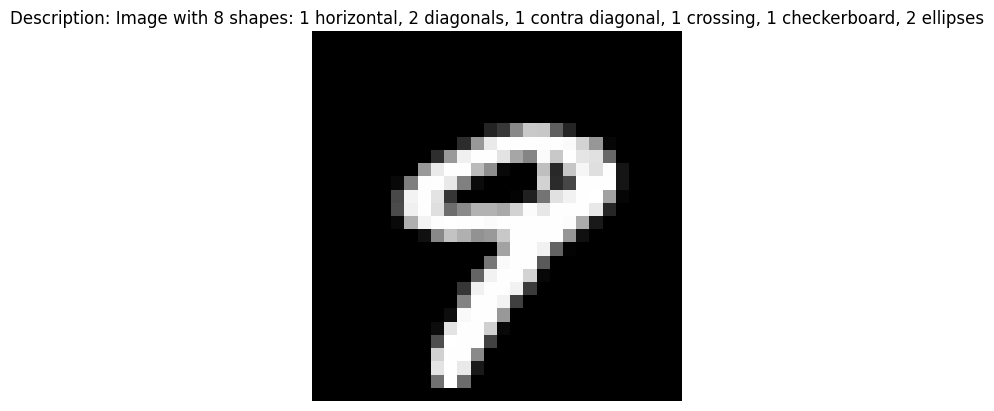

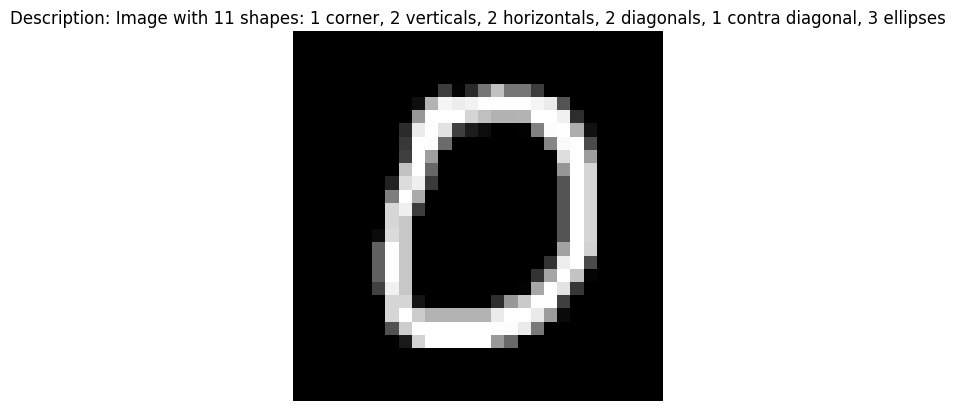

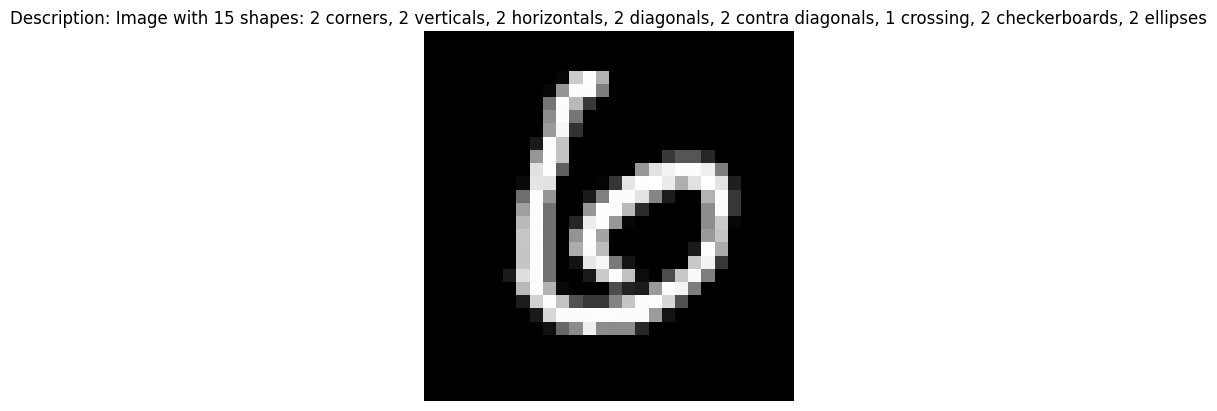

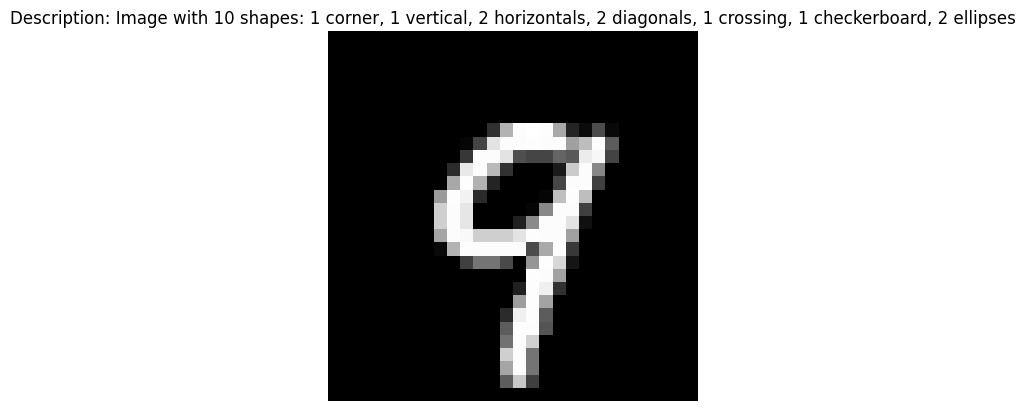

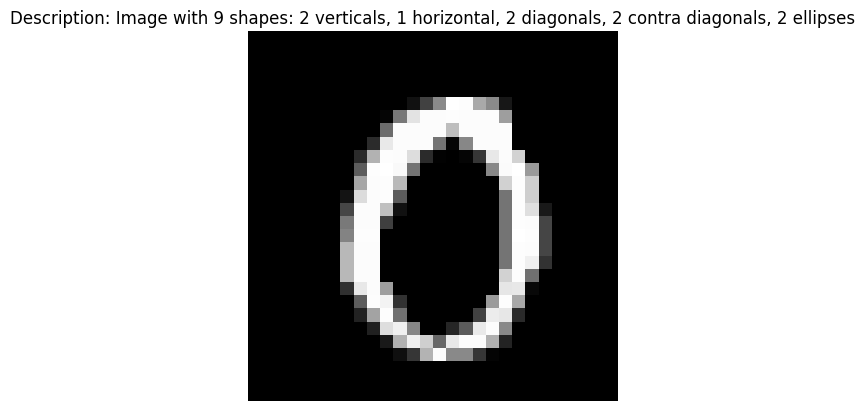

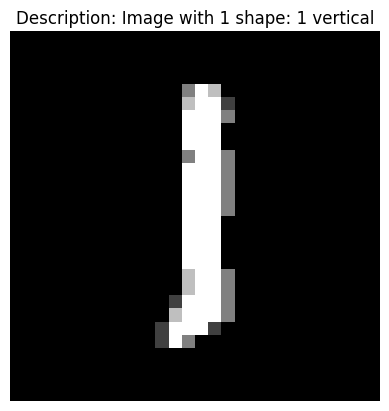

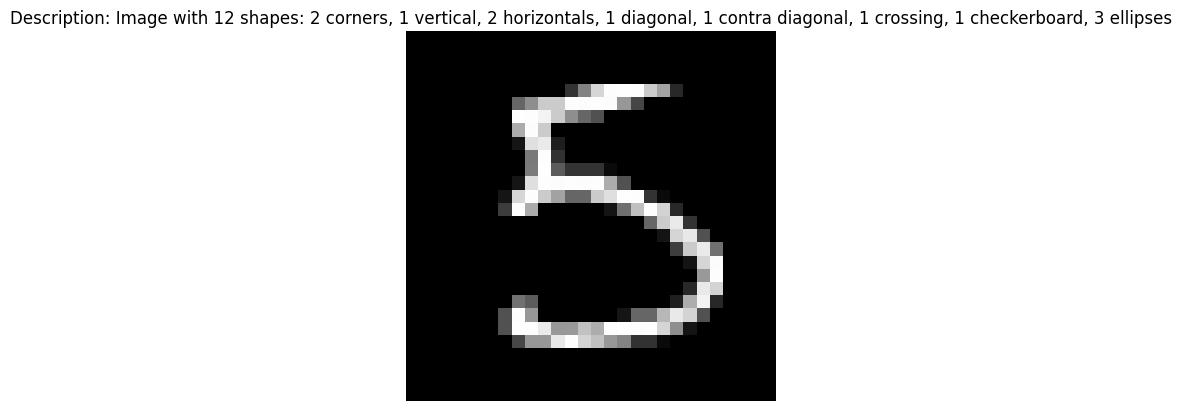

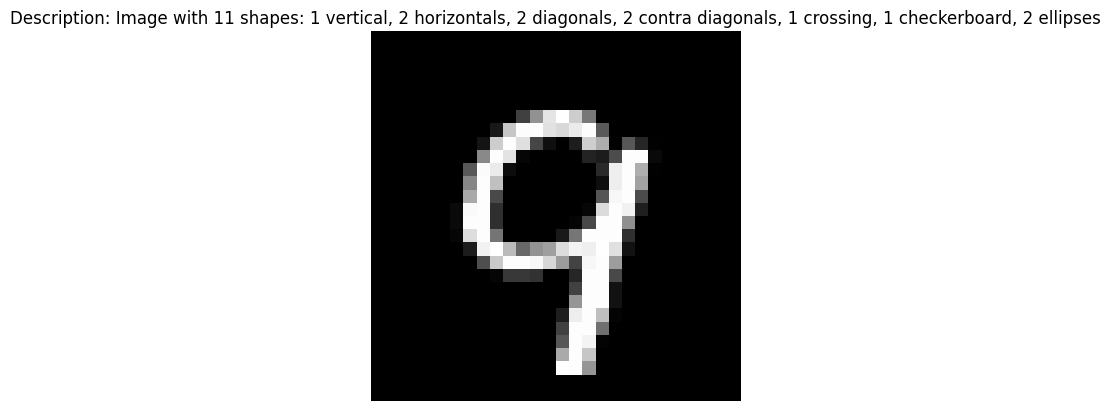

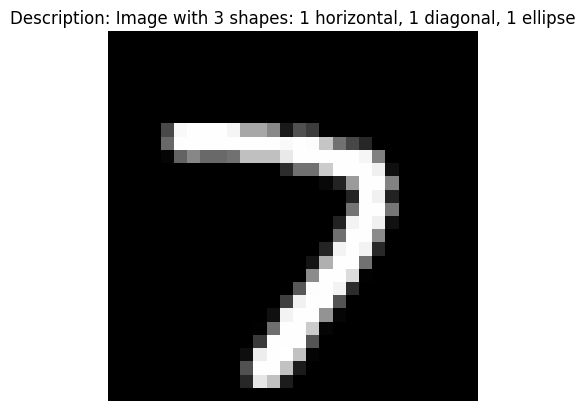

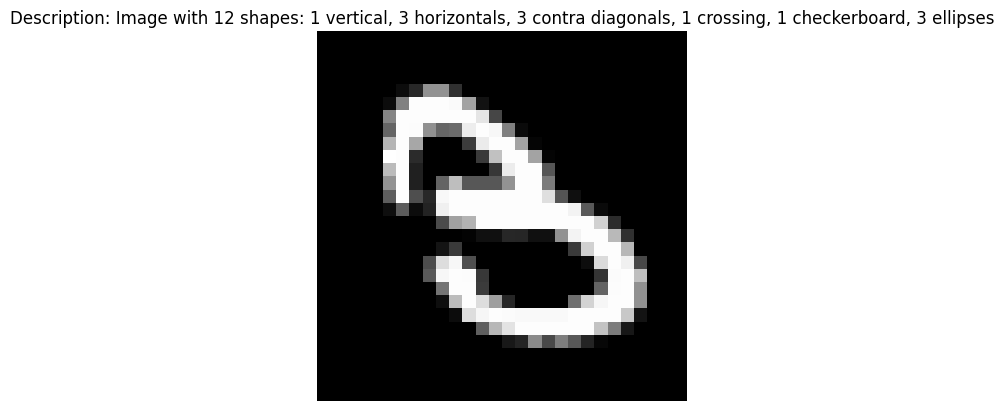

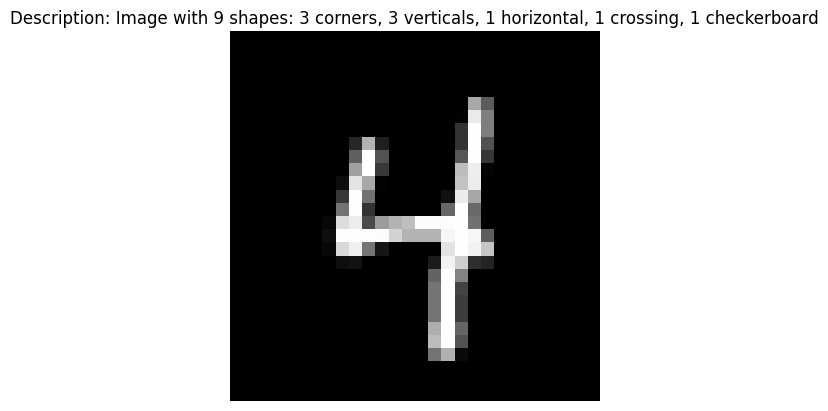

Completed processing batch 1 of 5


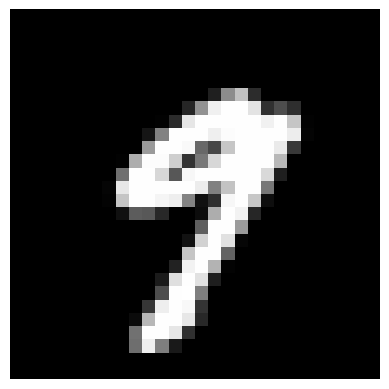

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


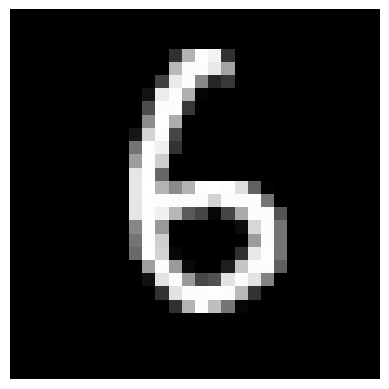

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  3


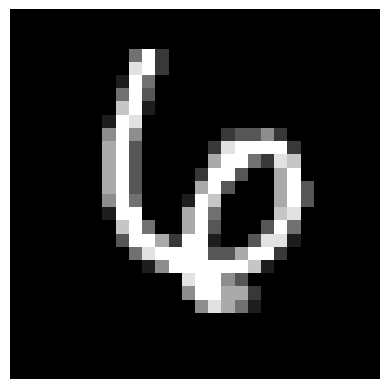

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  2


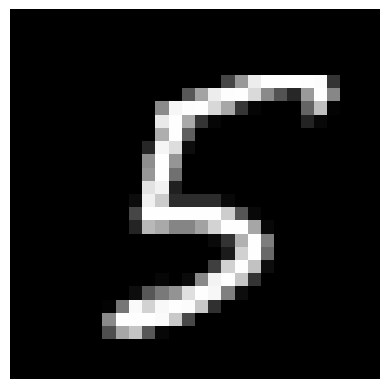

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


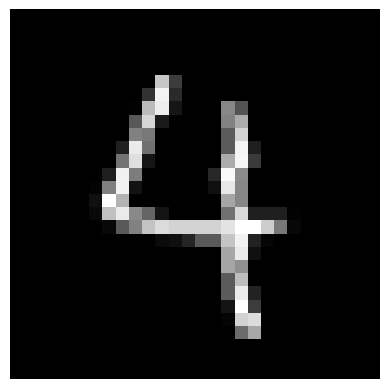

Enter count for num_corner (or type 'back' to revise previous):  4
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  0


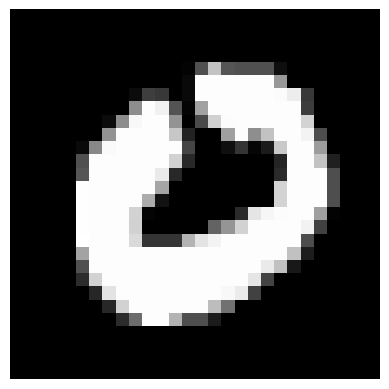

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  2


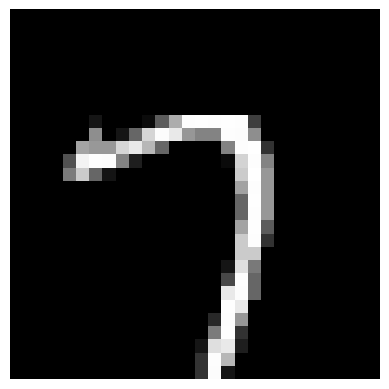

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  1


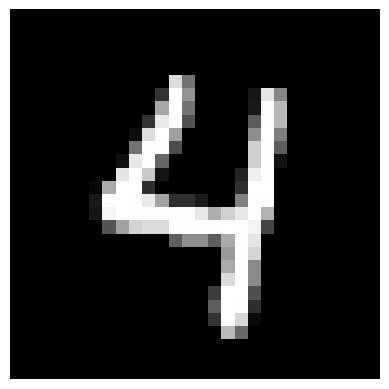

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  0


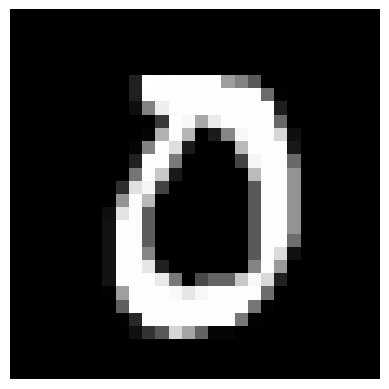

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


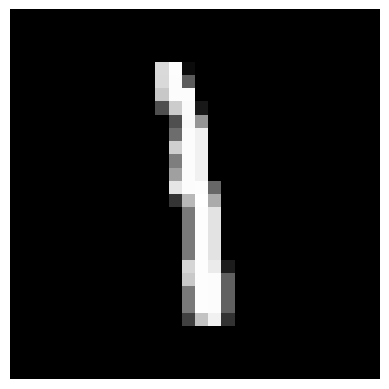

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


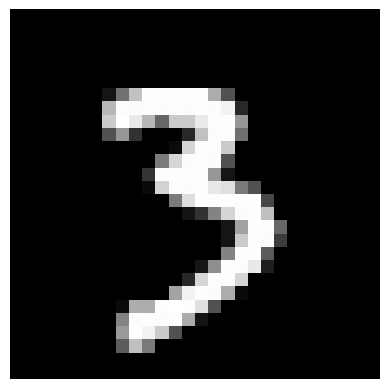

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


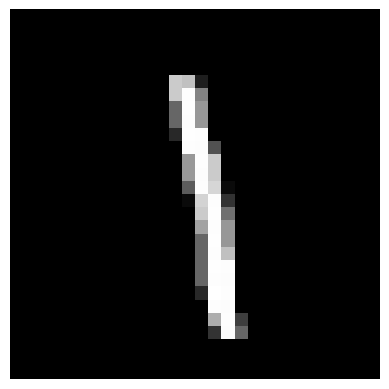

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  


Invalid input. Please enter a valid integer.


Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


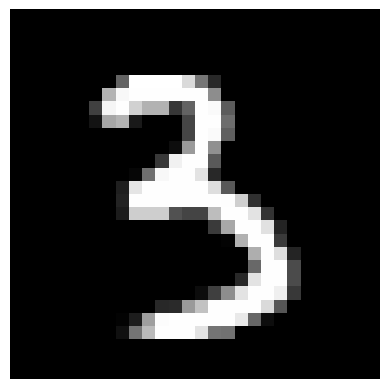

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  3


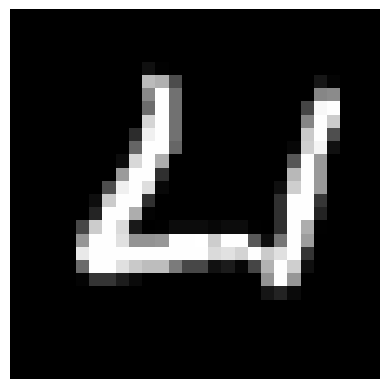

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  0


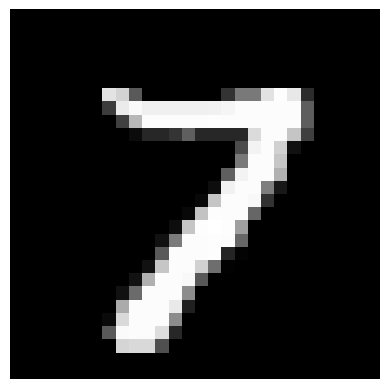

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


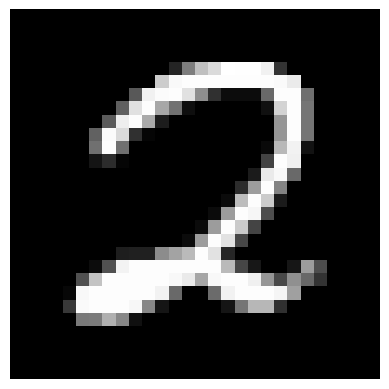

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  2
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


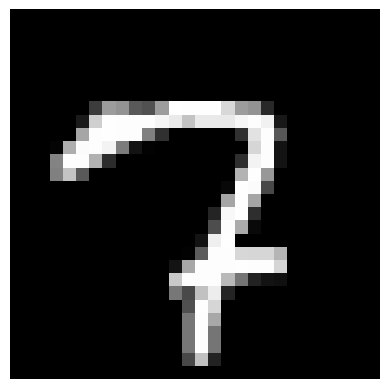

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


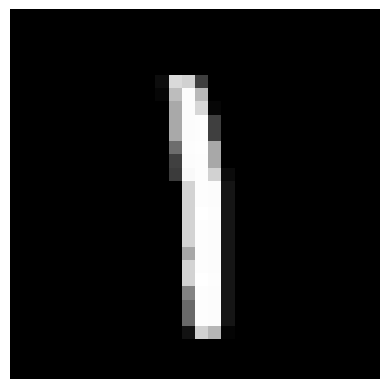

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


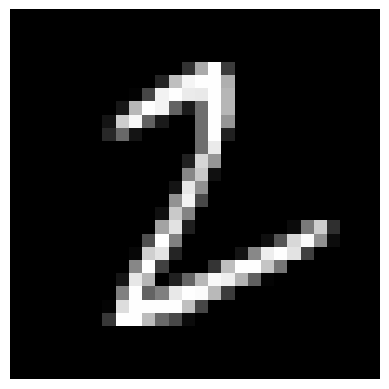

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  back
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


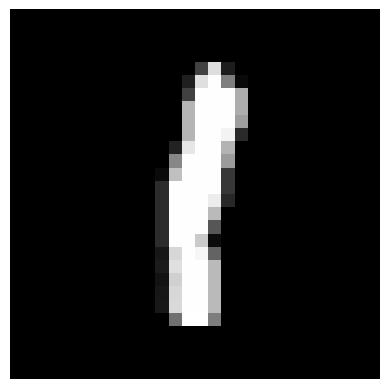

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


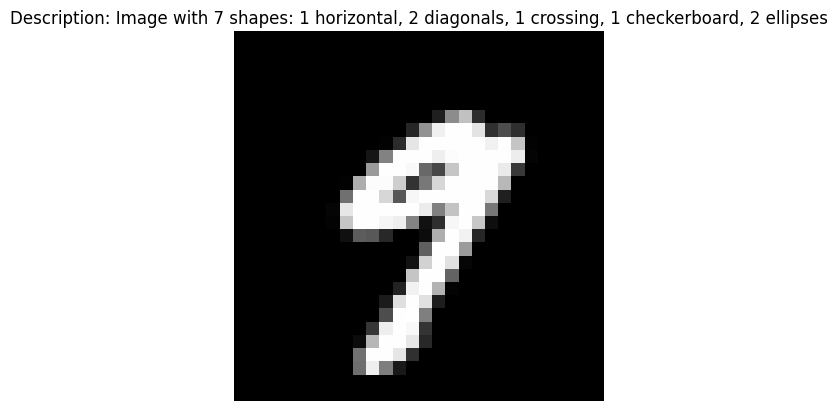

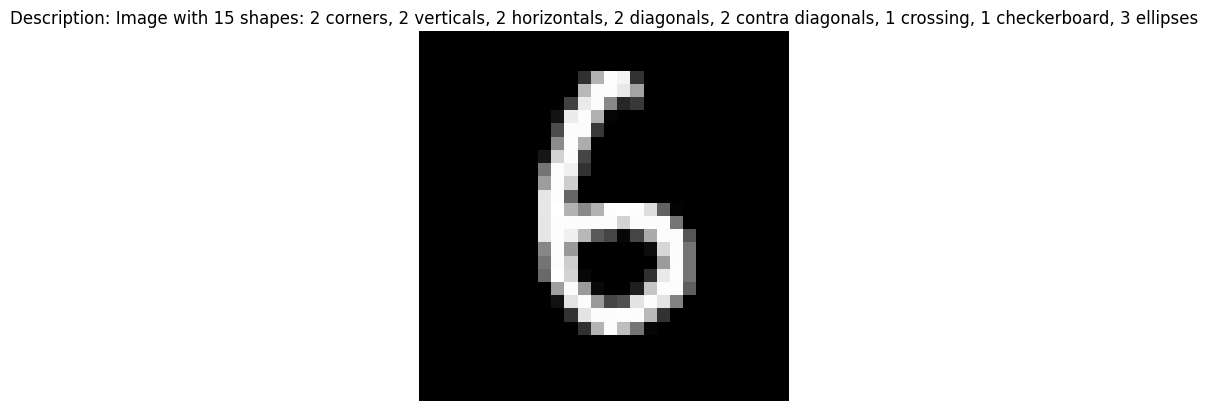

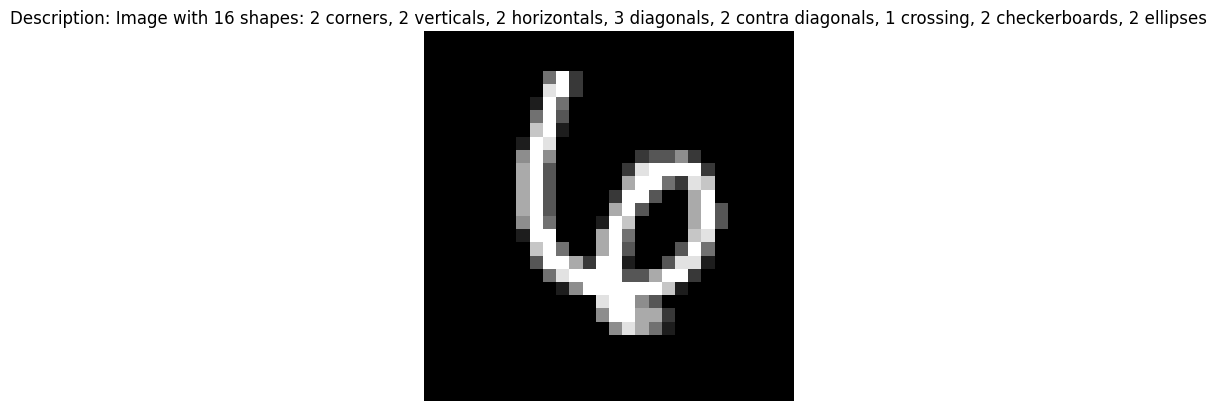

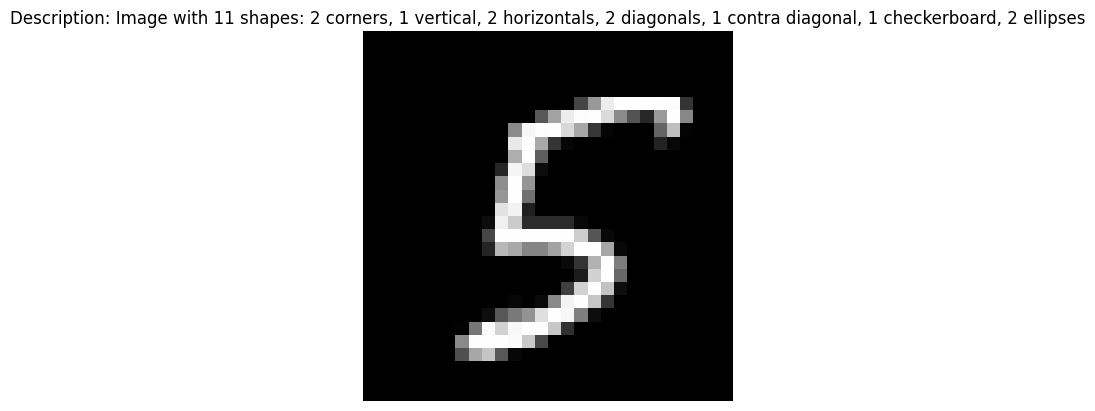

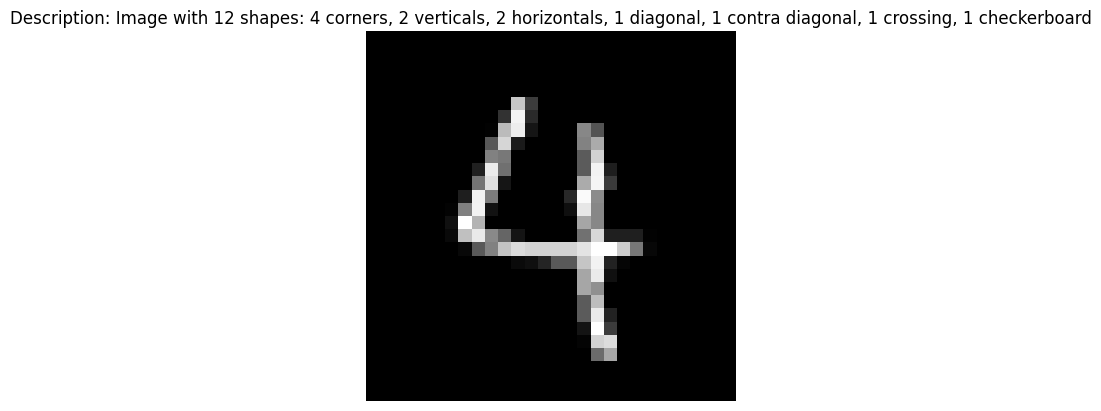

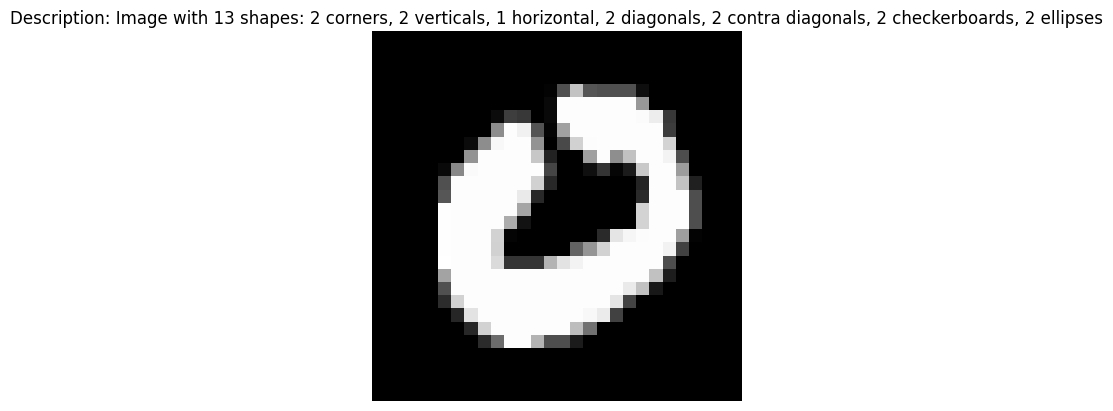

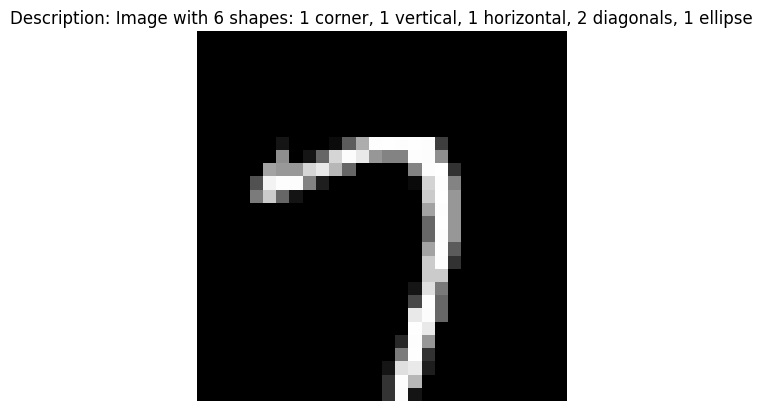

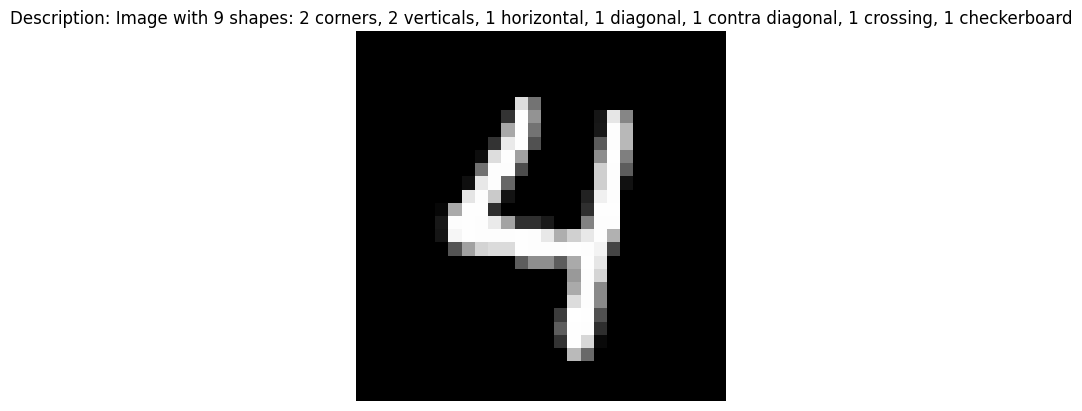

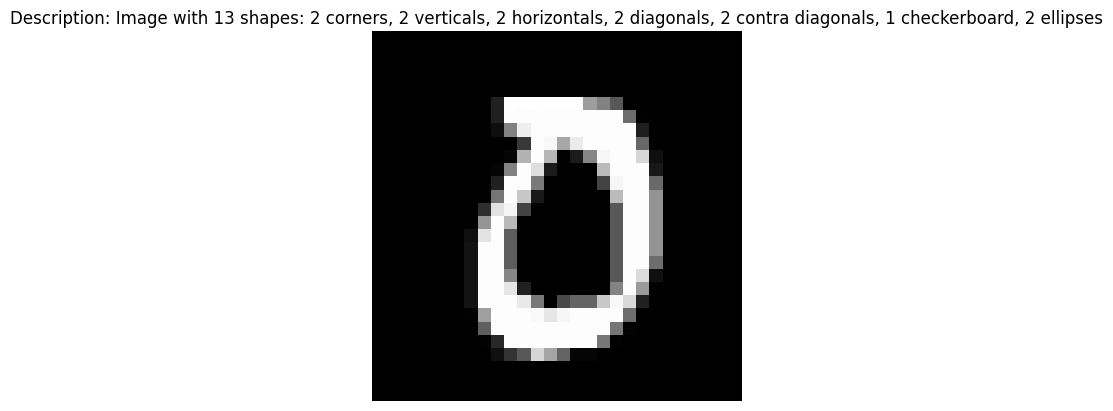

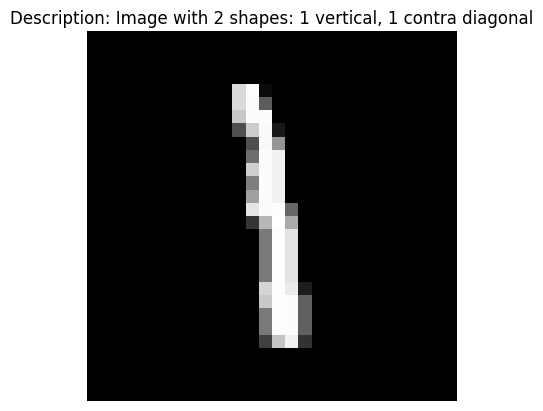

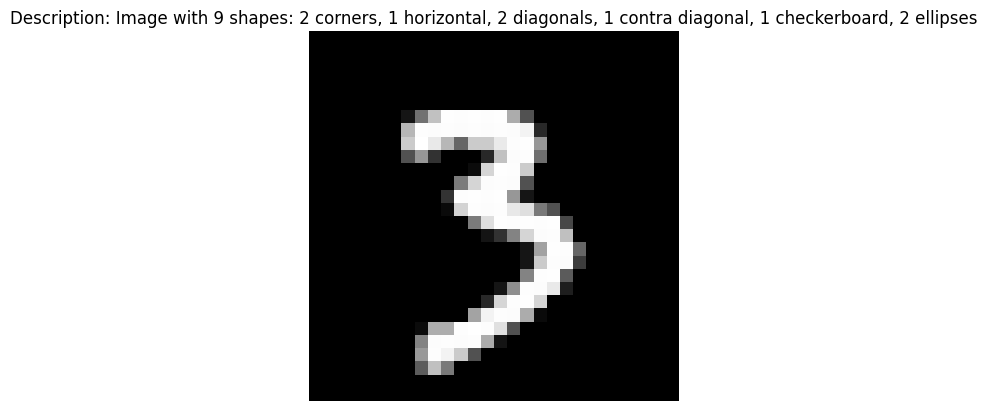

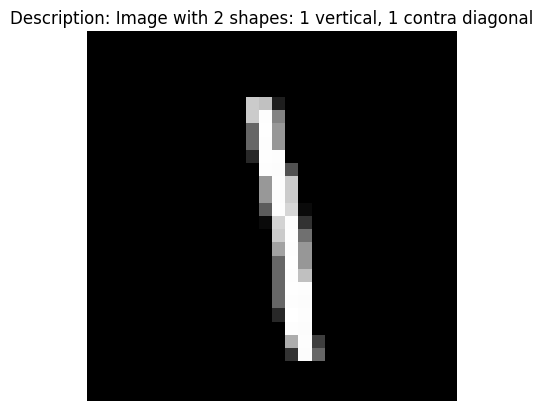

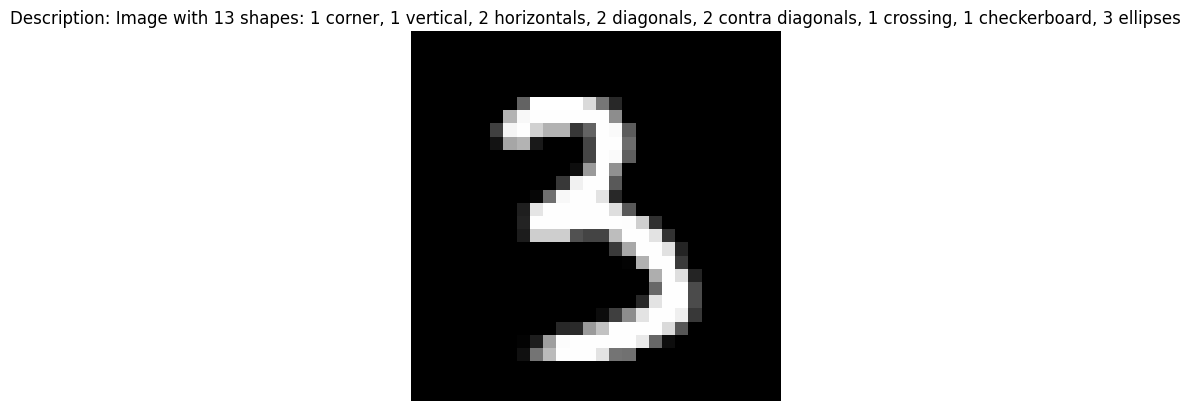

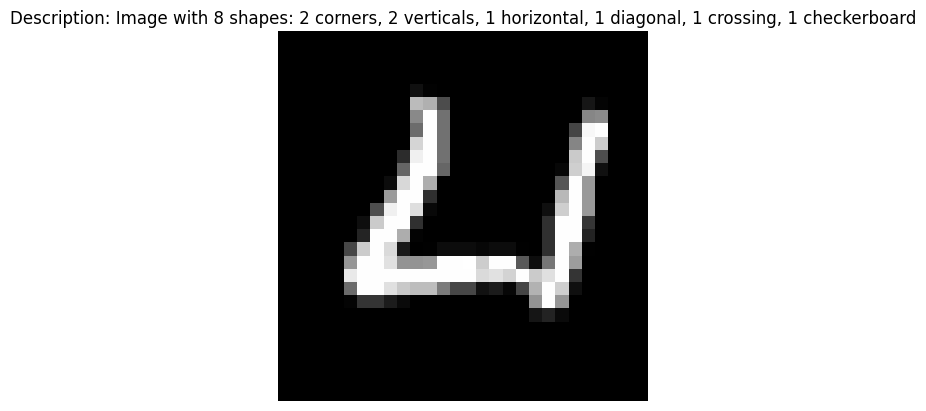

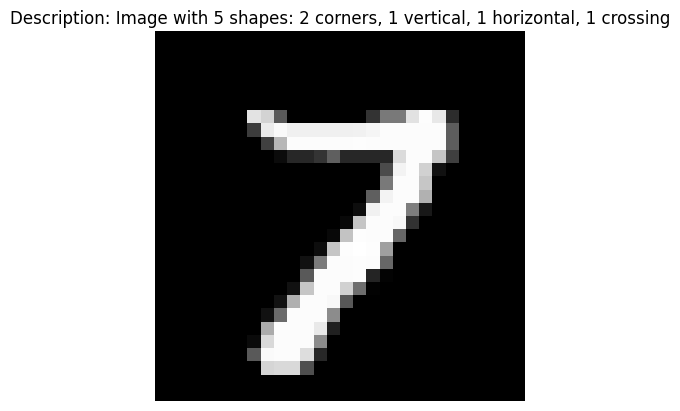

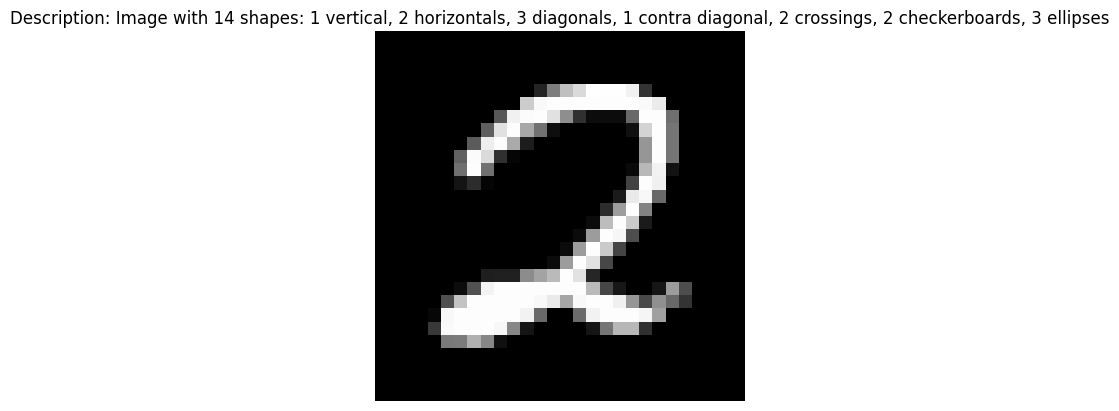

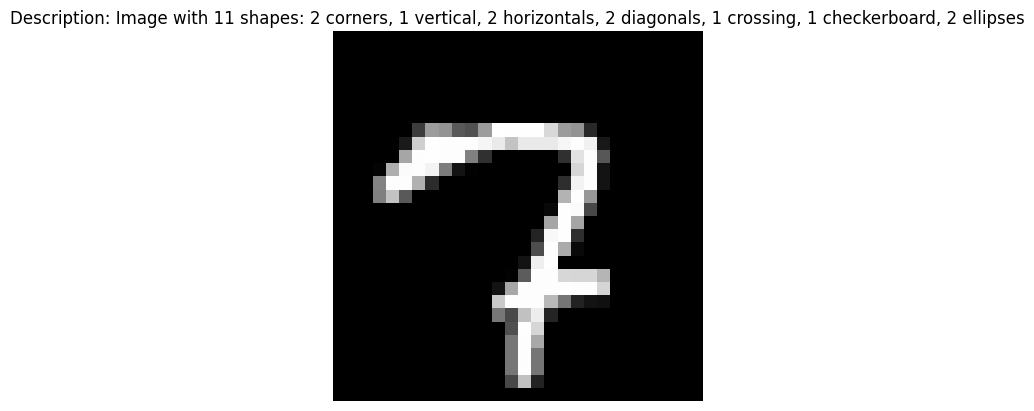

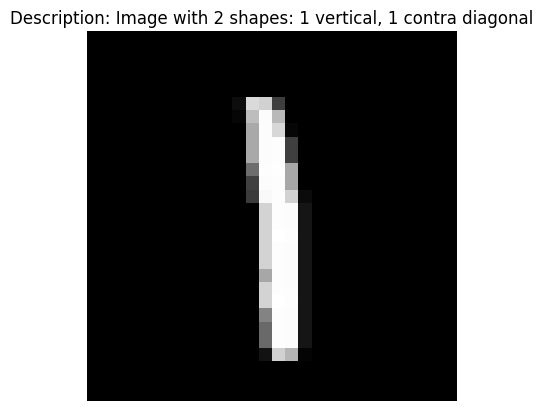

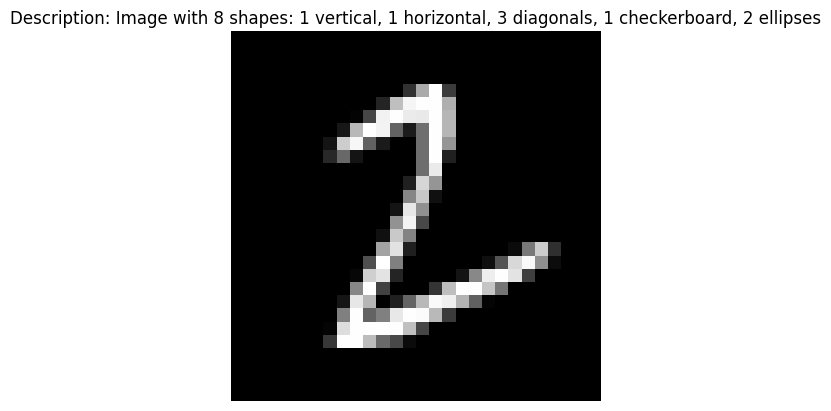

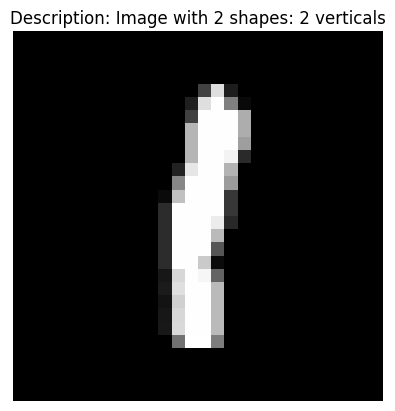

Completed processing batch 2 of 5


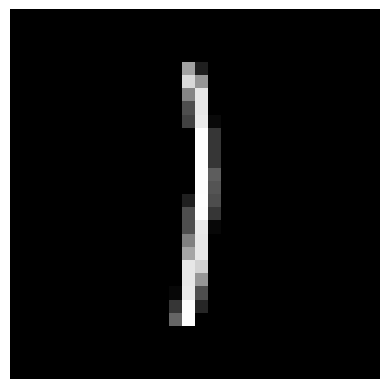

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  back
Enter count for num_crossing (or type 'back' to revise previous):  back
Enter count for num_contra_diagonal (or type 'back' to revise previous):  back
Enter count for num_diagonal (or type 'back' to revise previous):  back
Enter count for num_horizontal (or type 'back' to revise previous):  back
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous): 

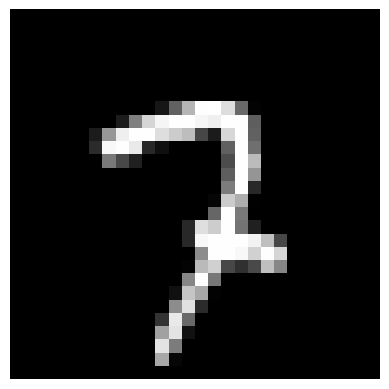

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


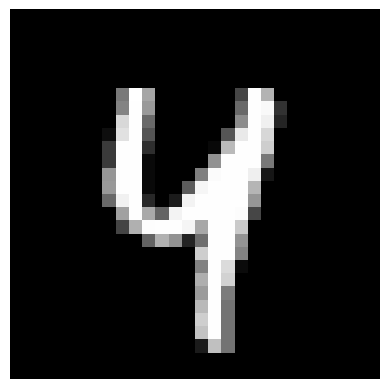

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


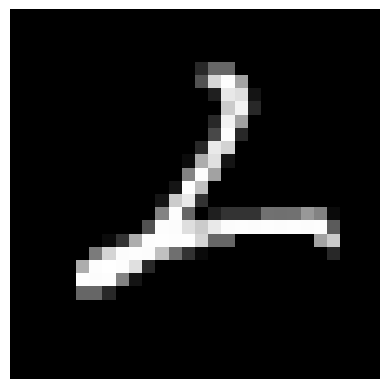

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  2


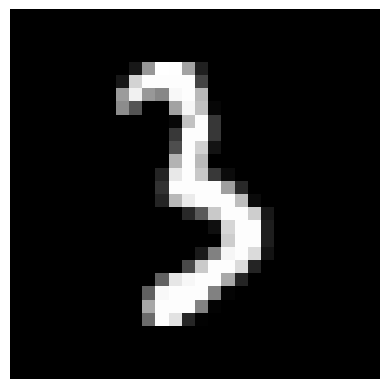

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  3


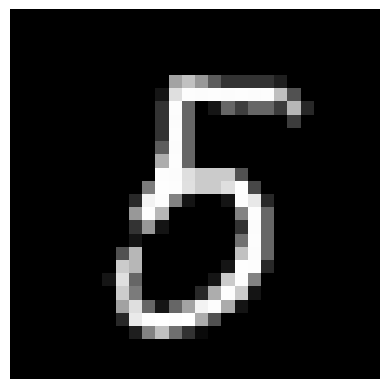

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  back
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  3
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  2


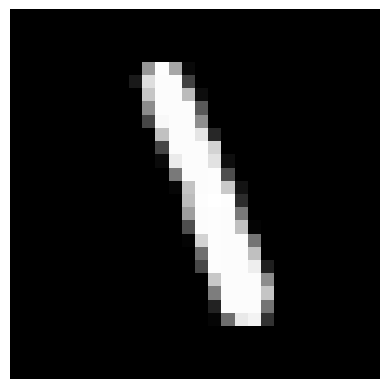

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


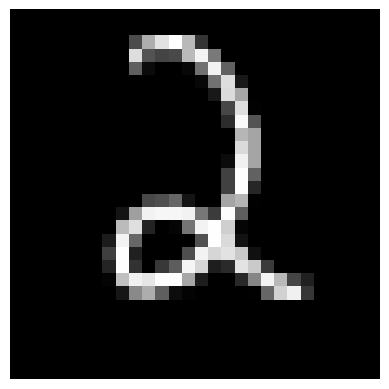

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  4
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  4


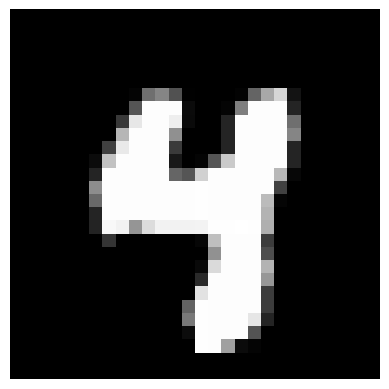

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  1


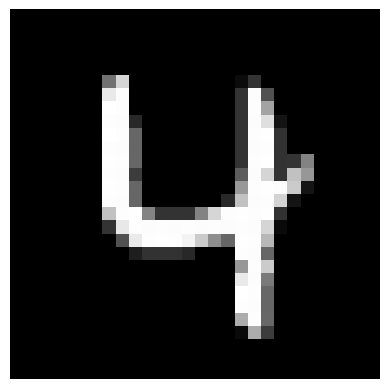

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


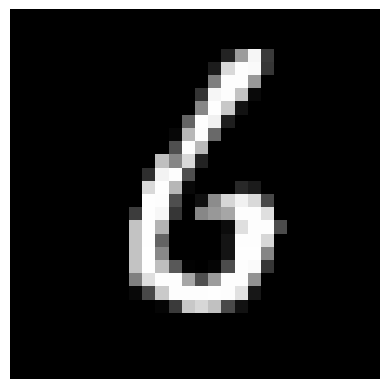

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  2


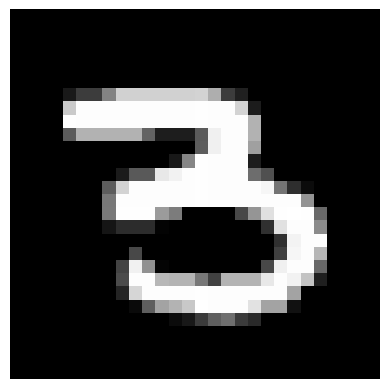

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  3


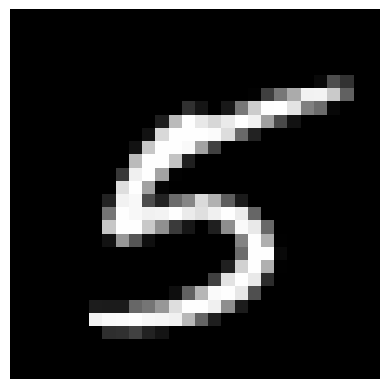

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


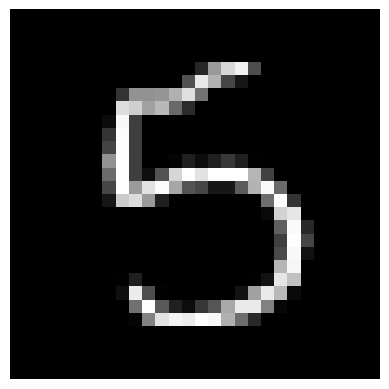

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  2


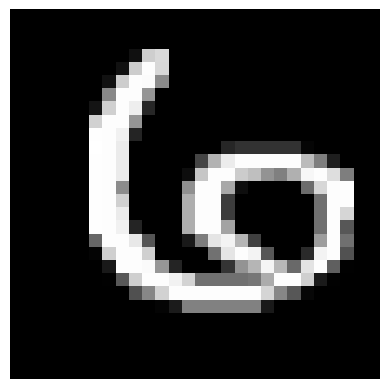

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  3
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  4


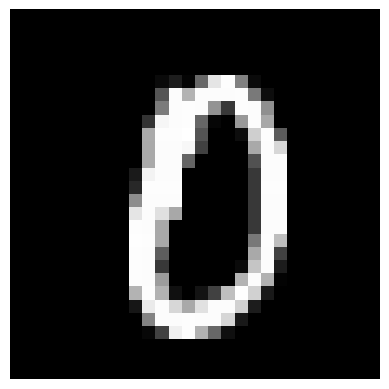

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  3


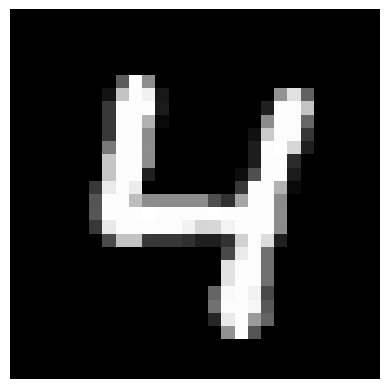

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


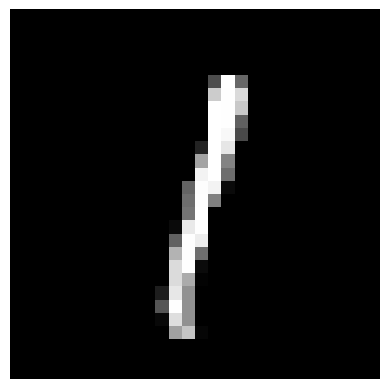

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  back
Enter count for num_diagonal (or type 'back' to revise previous):  back
Enter count for num_horizontal (or type 'back' to revise previous):  back
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  back
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
En

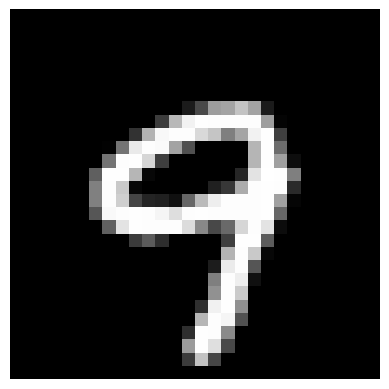

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  2


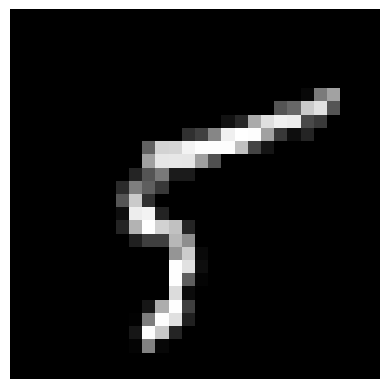

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  1


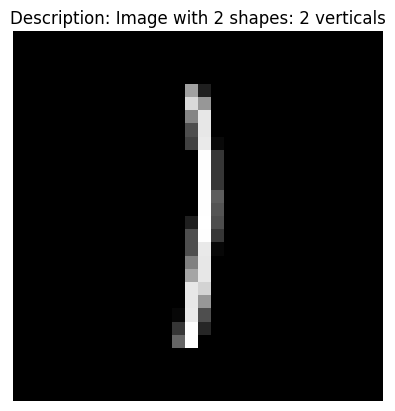

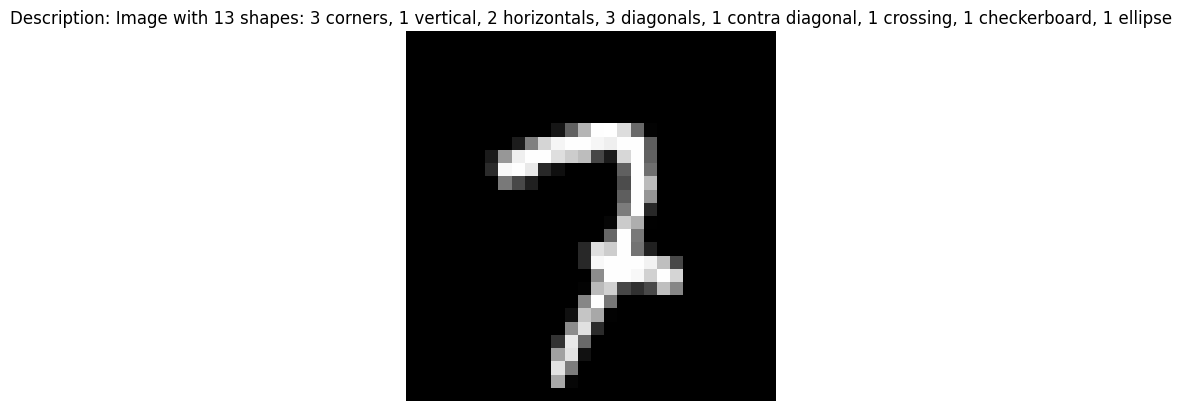

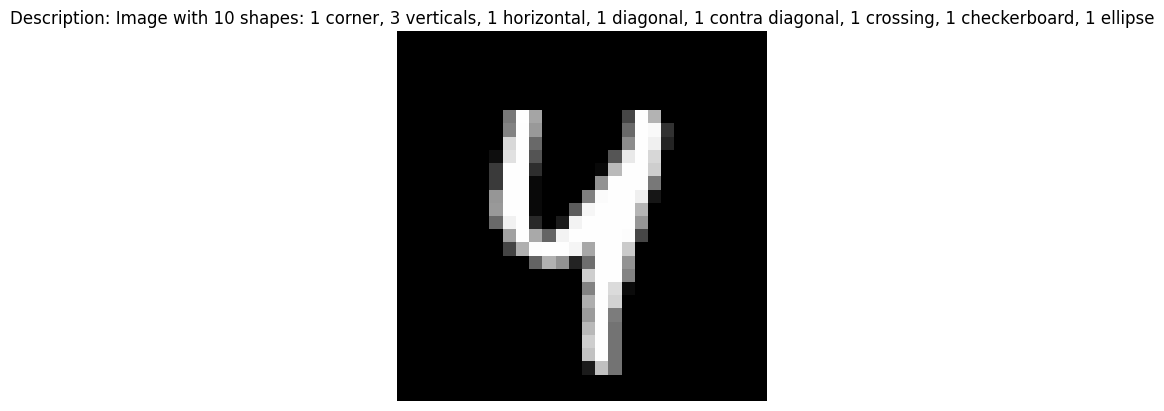

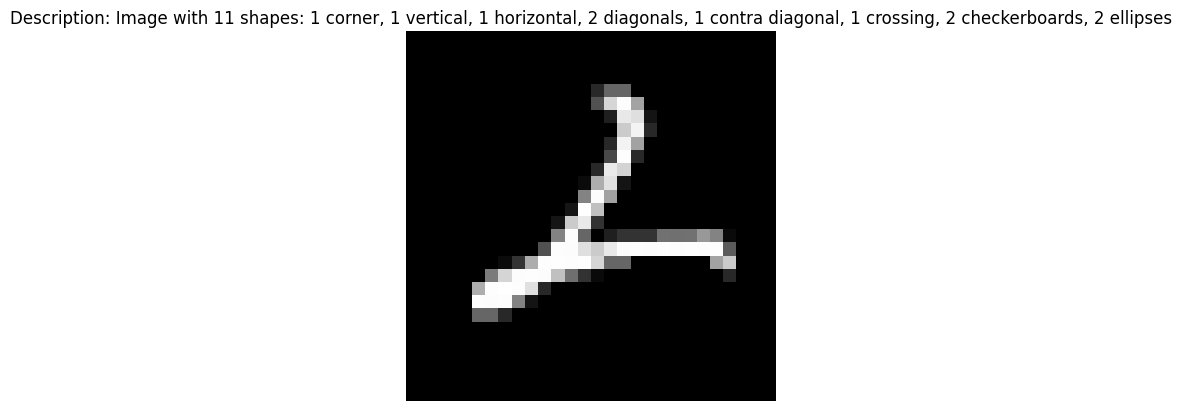

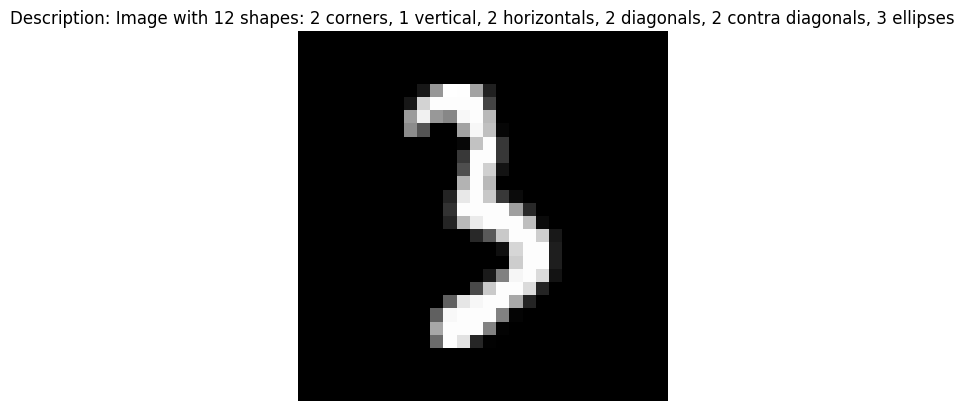

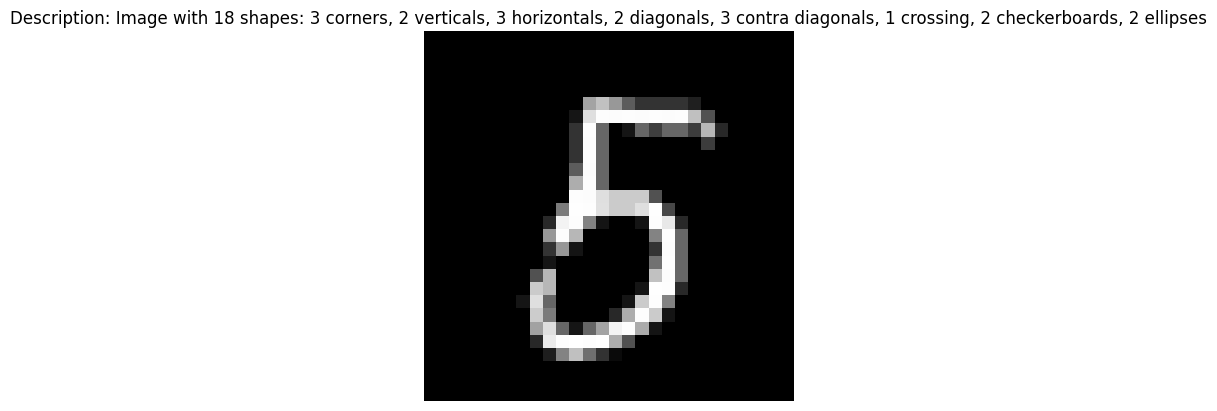

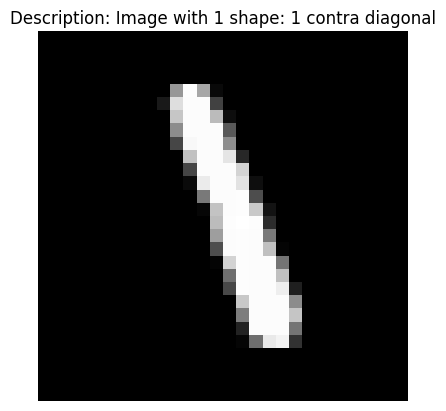

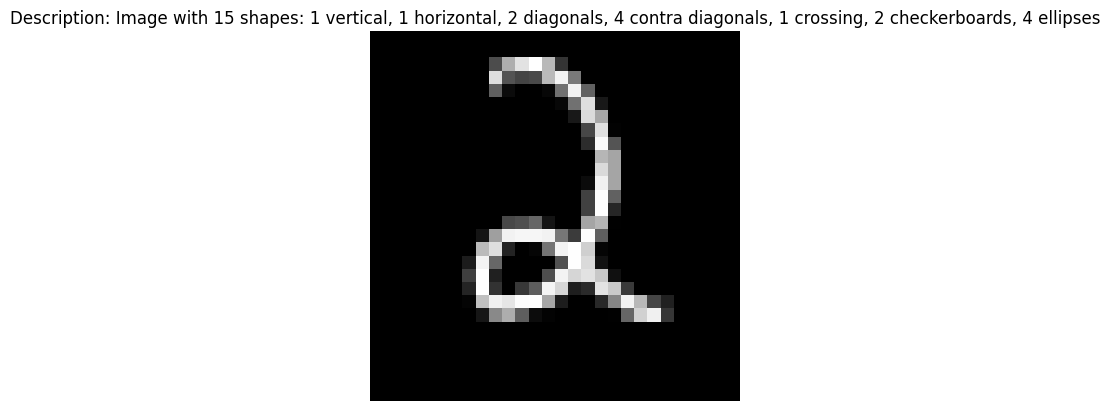

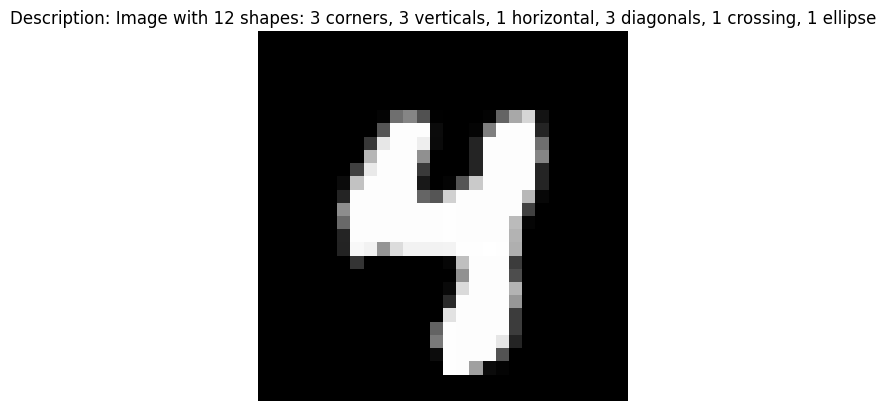

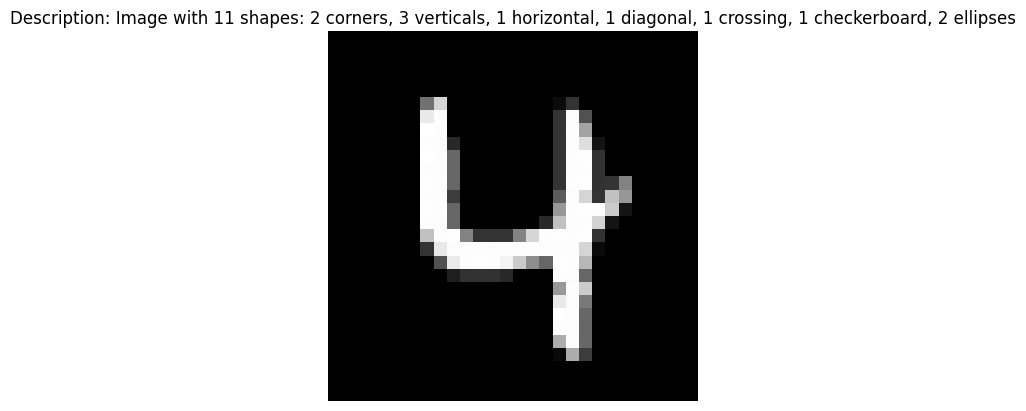

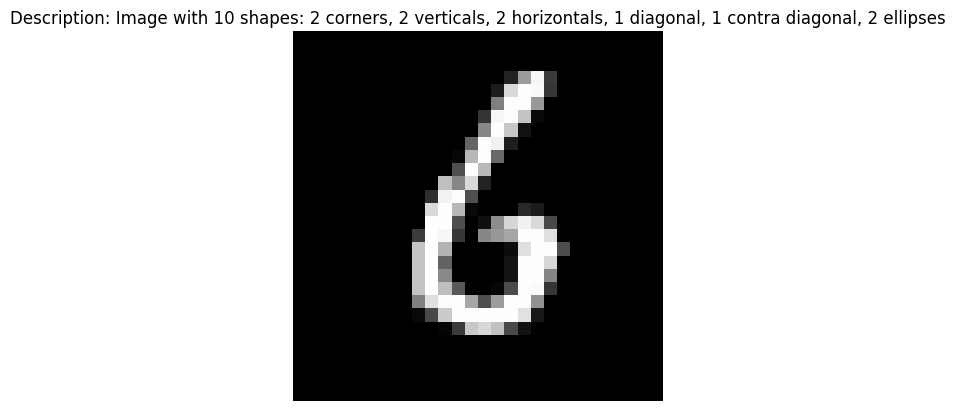

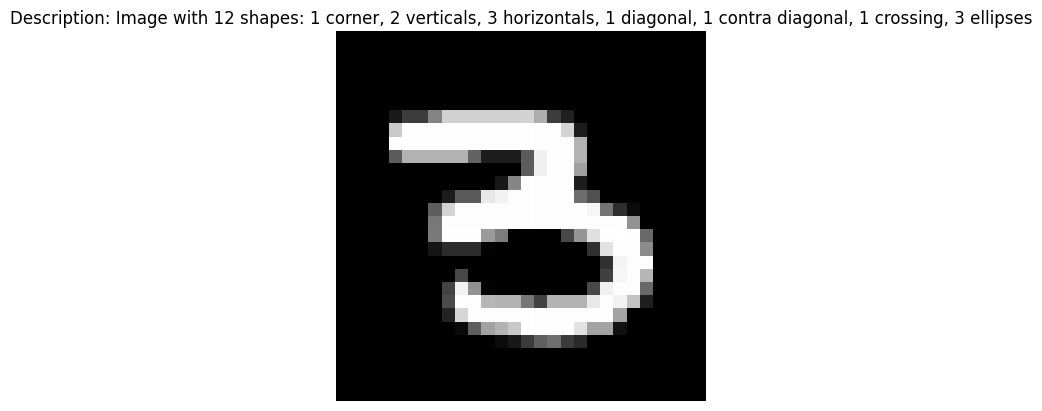

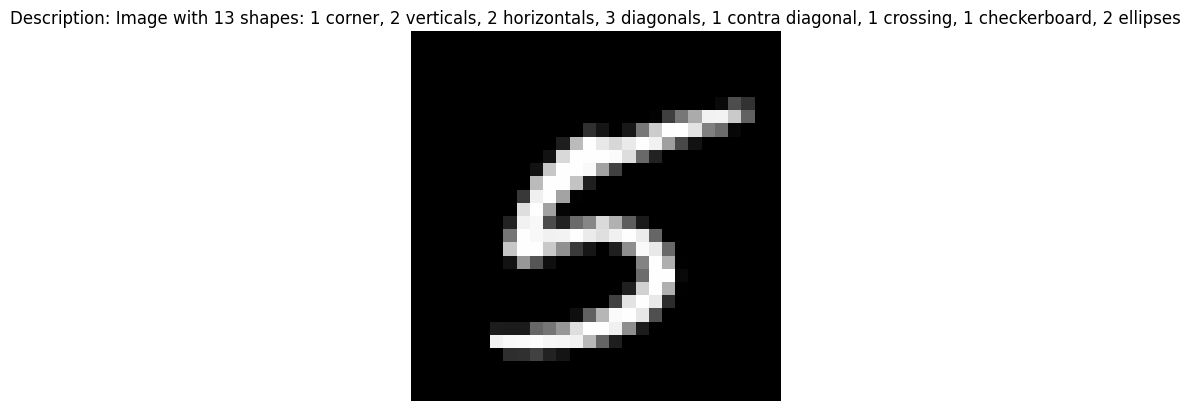

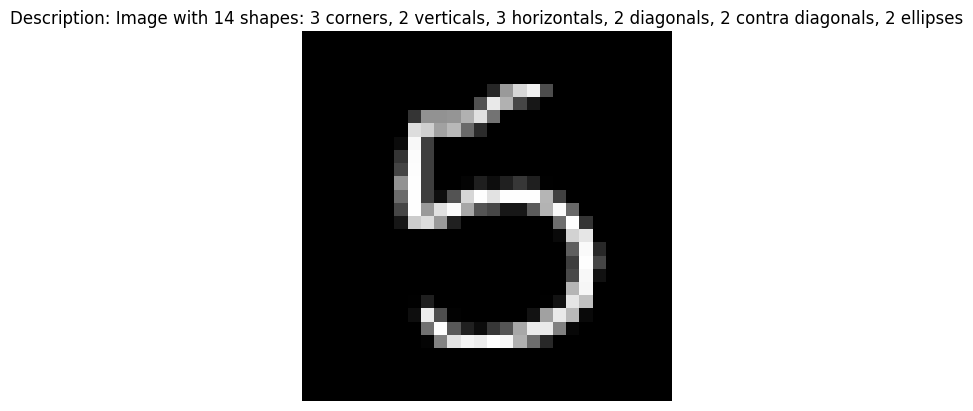

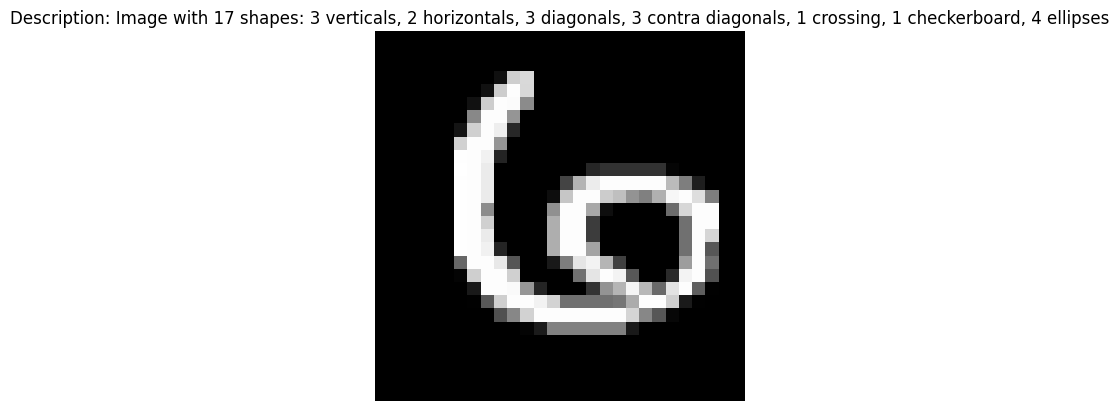

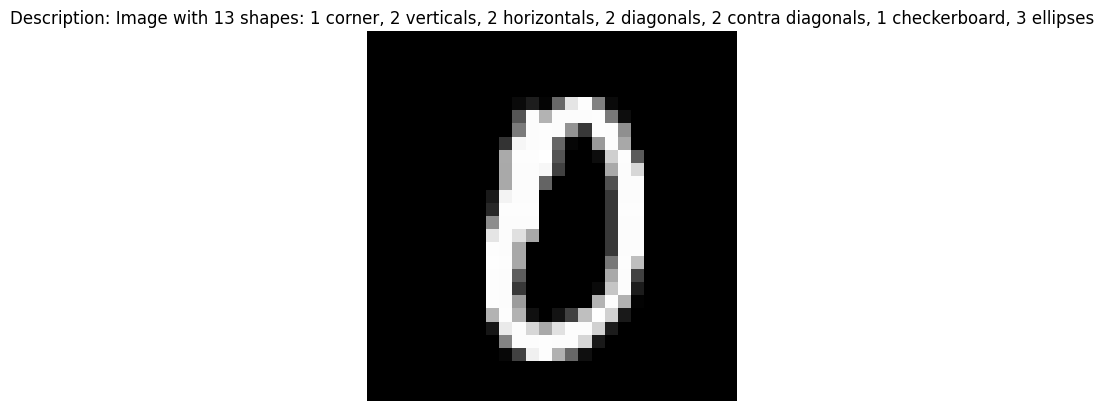

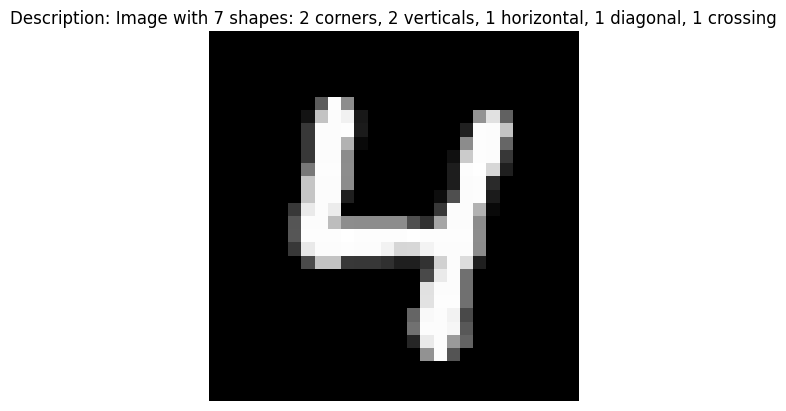

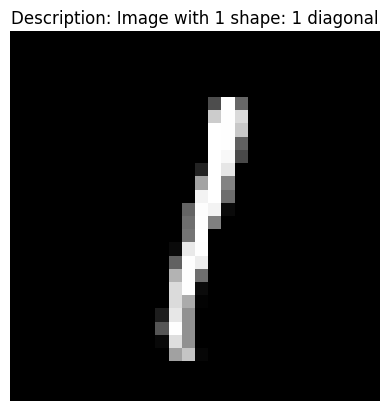

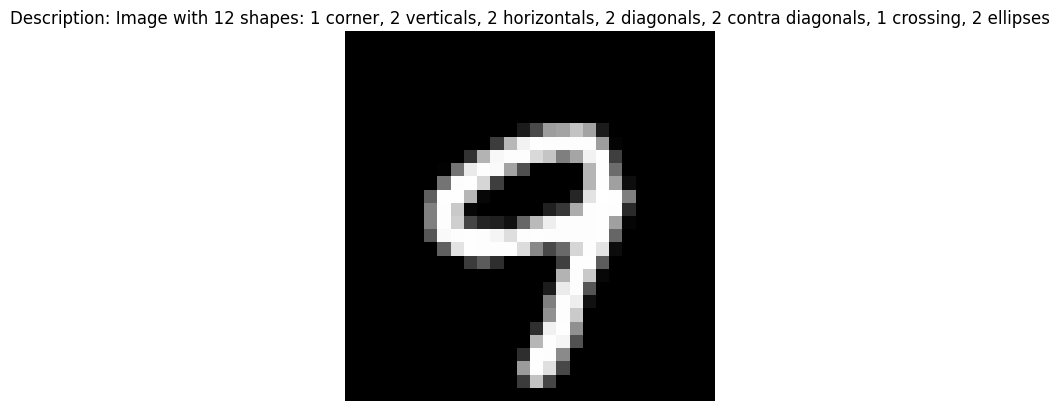

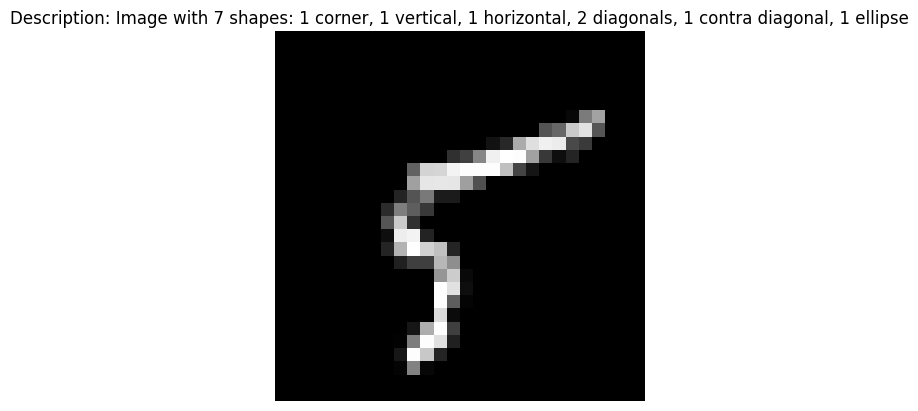

Completed processing batch 3 of 5


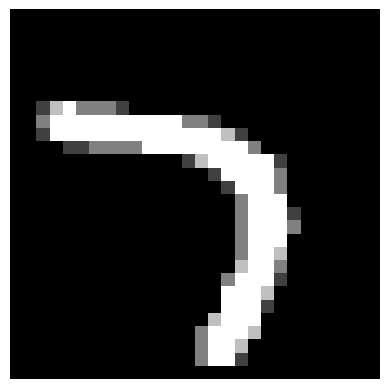

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  1


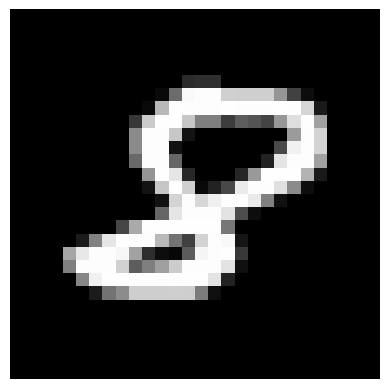

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  4
Enter count for num_contra_diagonal (or type 'back' to revise previous):  4
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  4


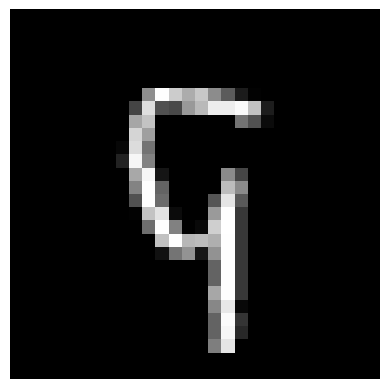

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


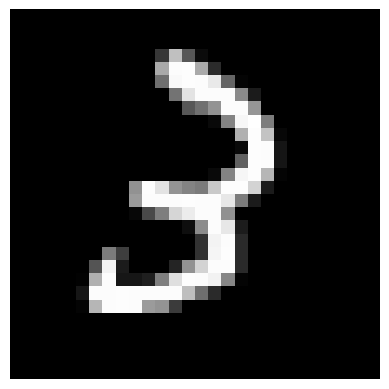

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


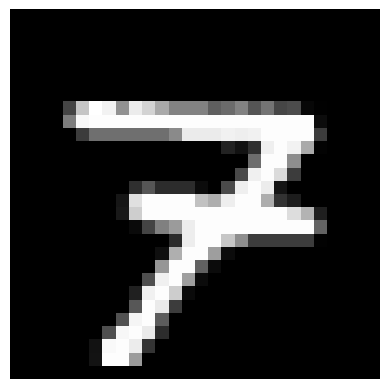

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  3
Enter count for num_ellipse (or type 'back' to revise previous):  1


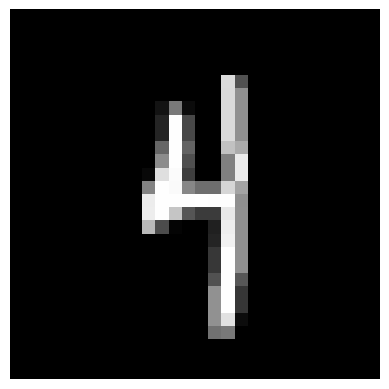

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  0


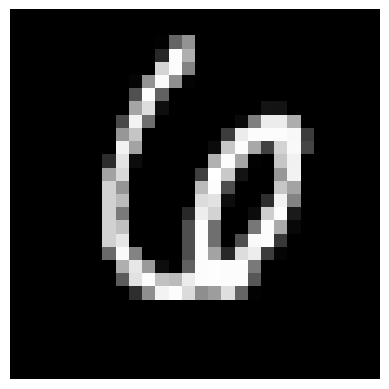

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


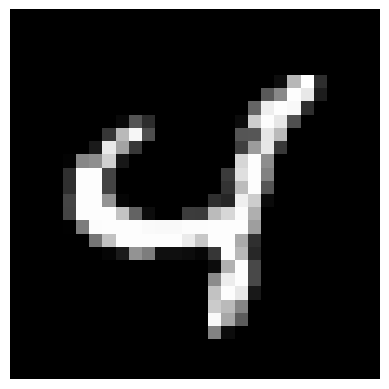

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  1


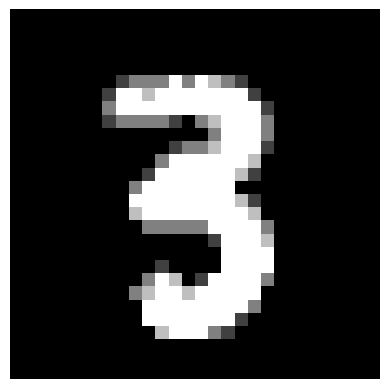

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


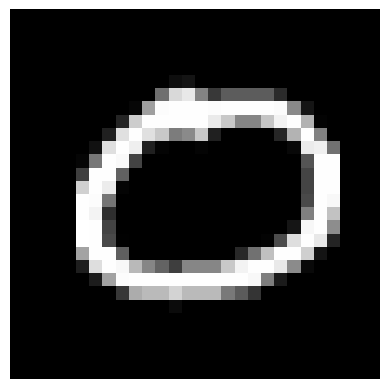

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  back
Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  3
Enter count for num_crossing (or type 'back' to revise previous):  back
Enter count for num_contra_diagonal (or type 'back' to revise previous):  back
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  4


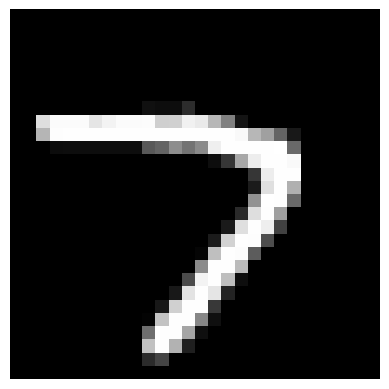

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


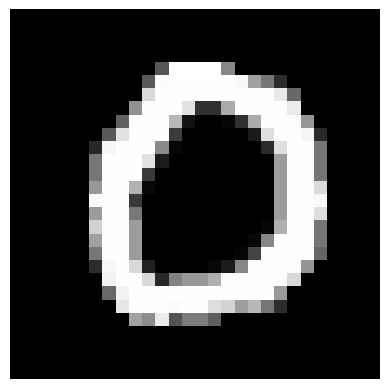

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  3


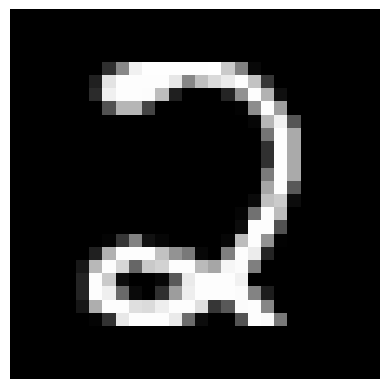

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


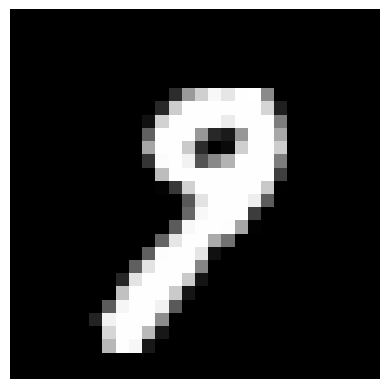

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  back
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


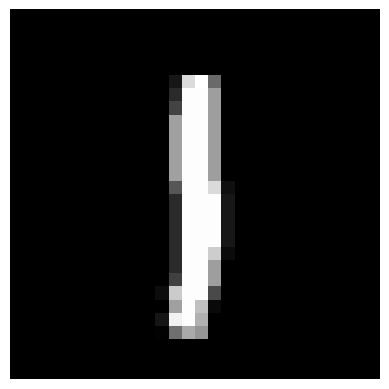

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


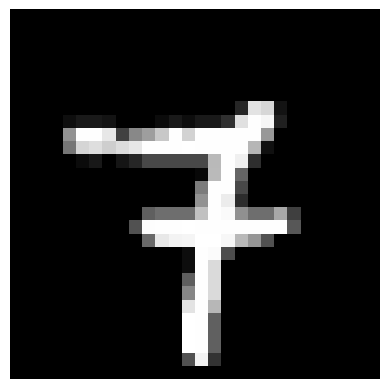

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


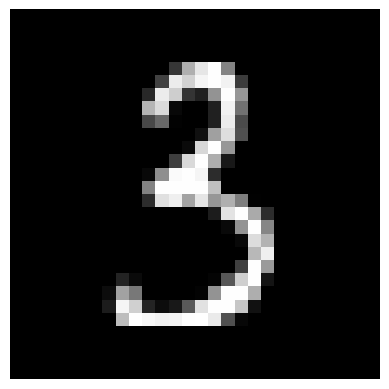

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  4


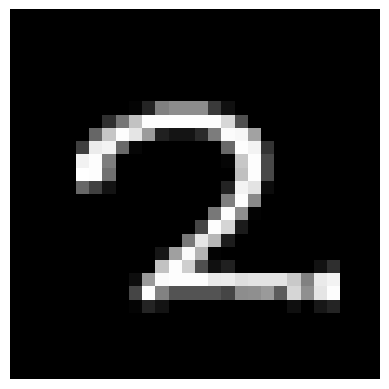

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  2


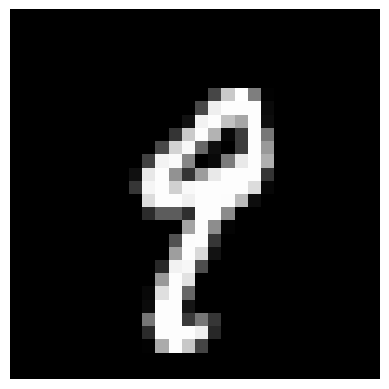

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  back
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


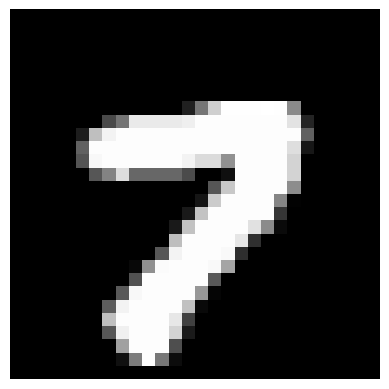

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  back
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  0


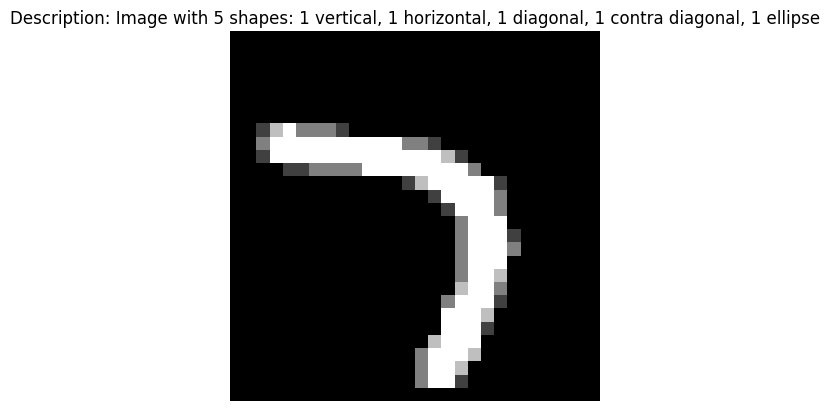

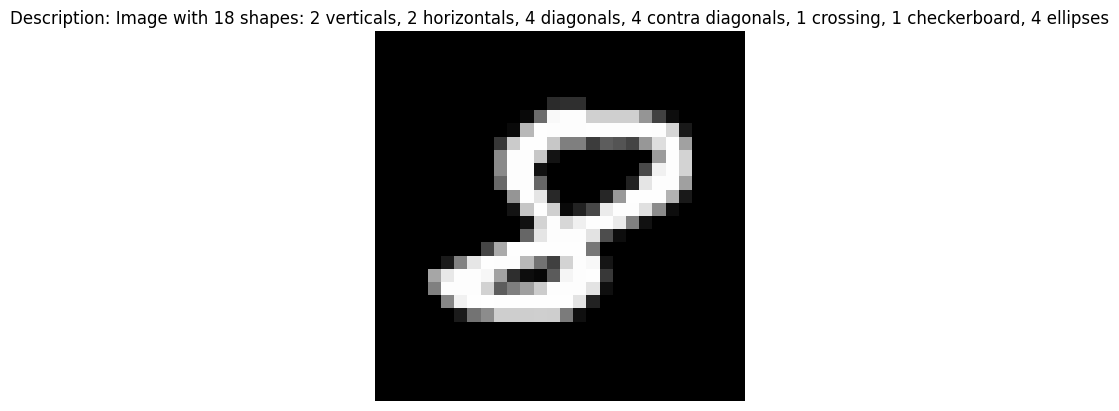

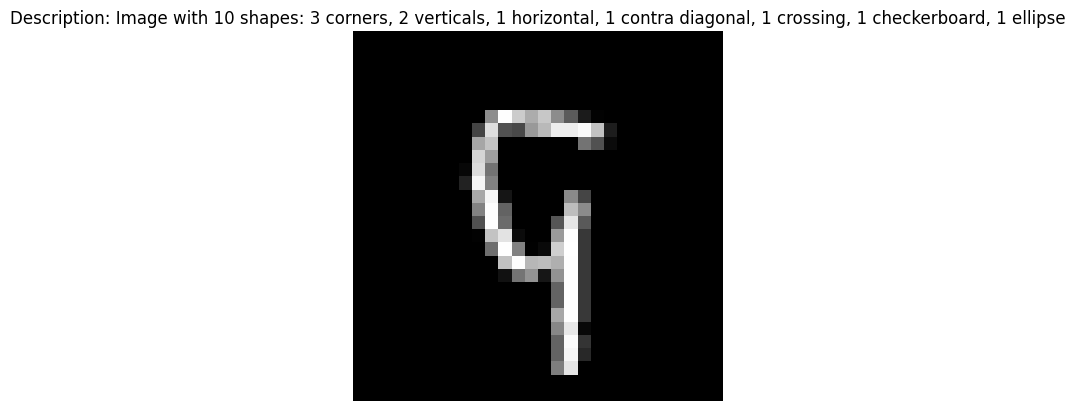

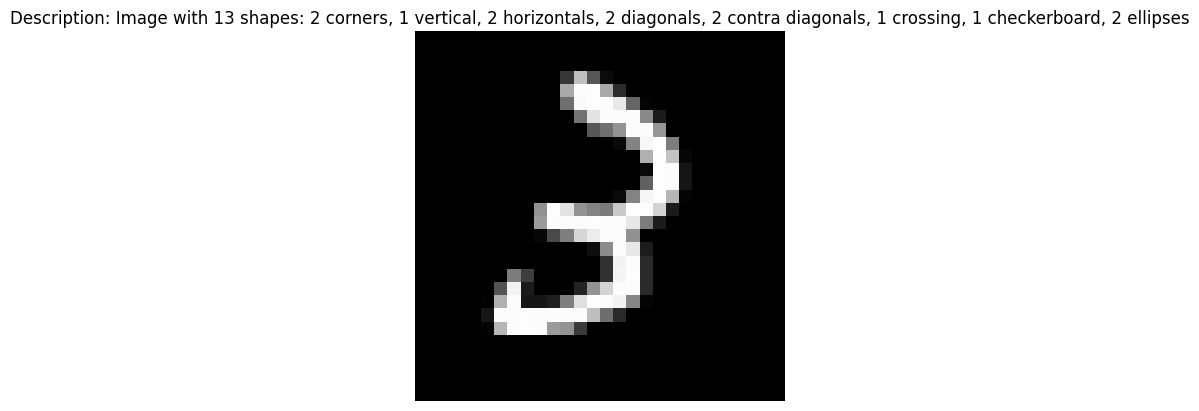

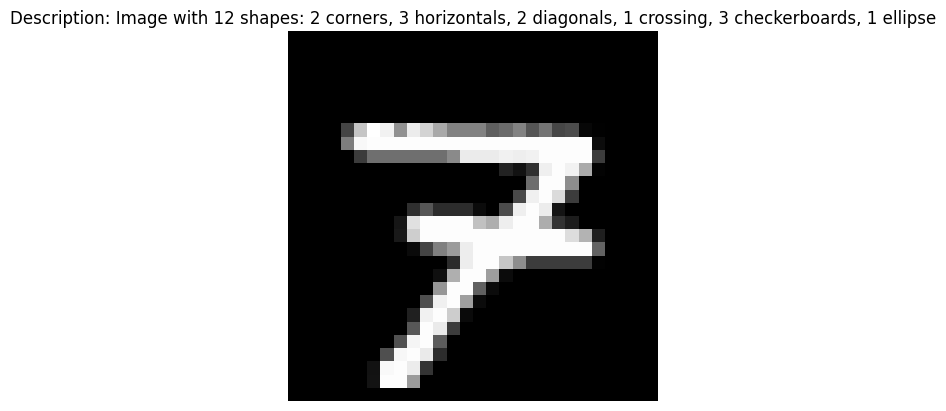

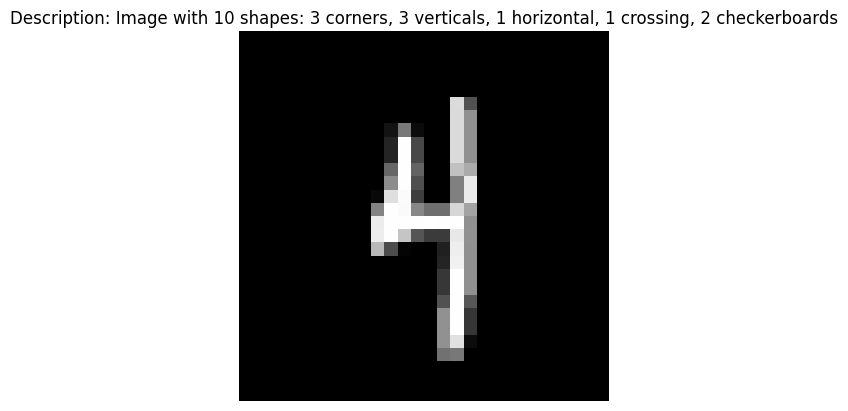

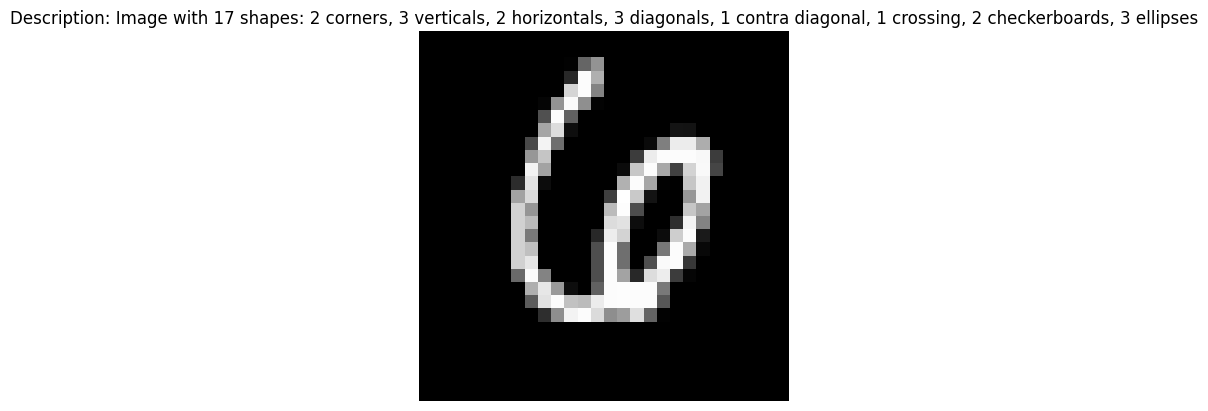

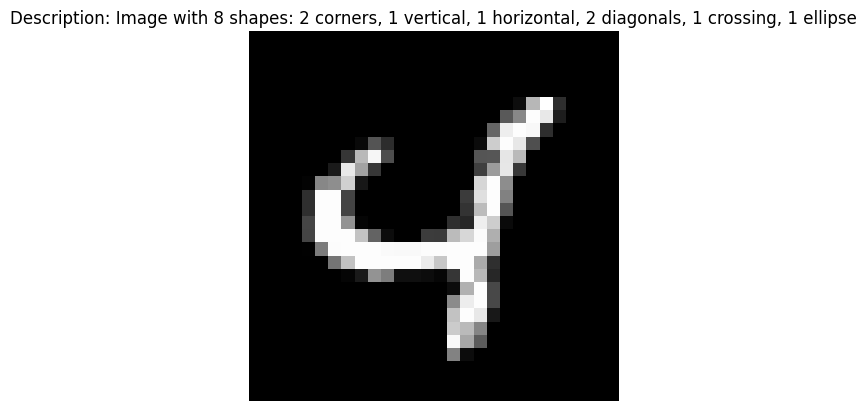

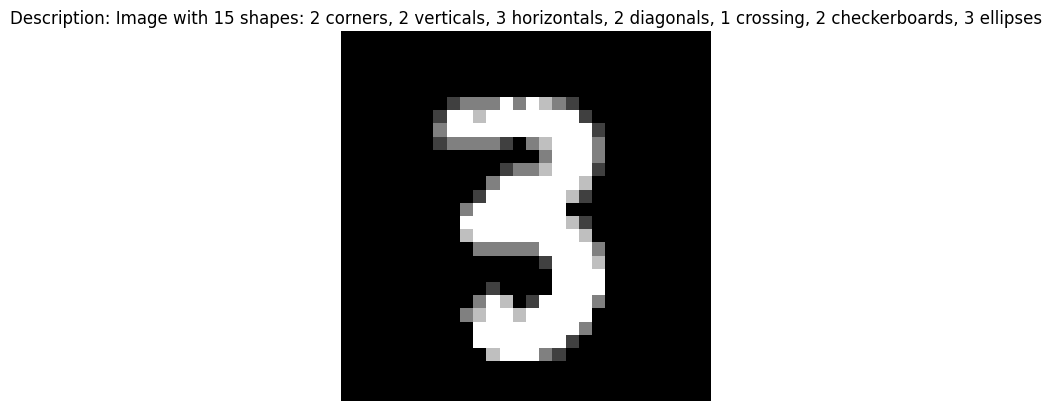

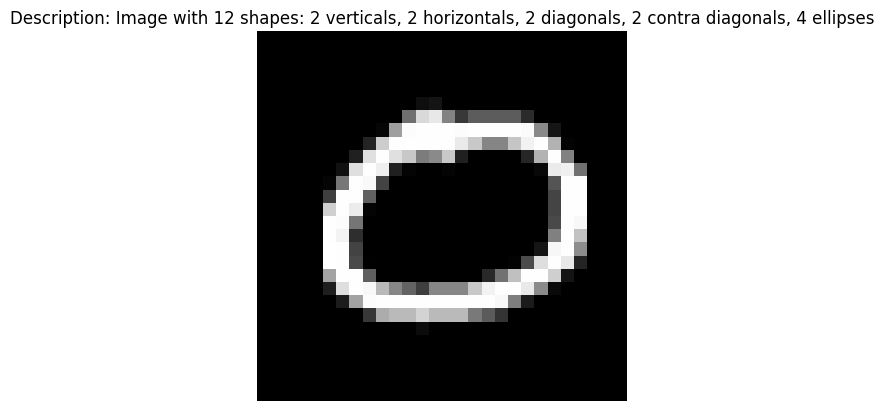

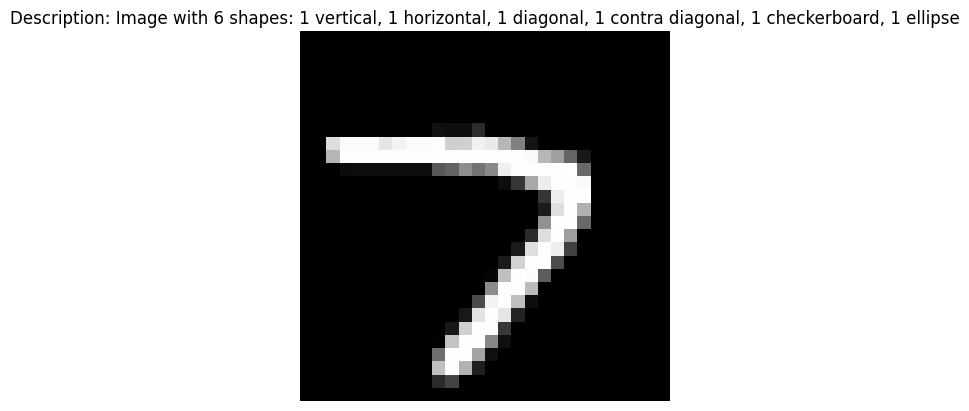

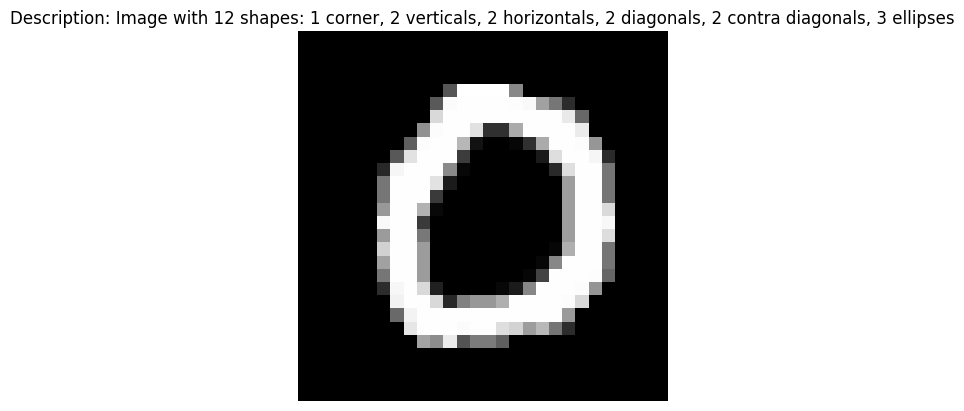

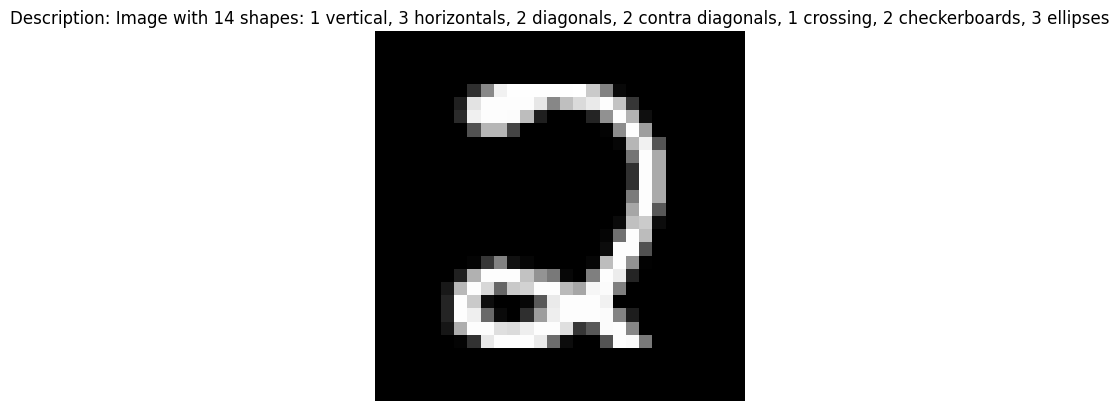

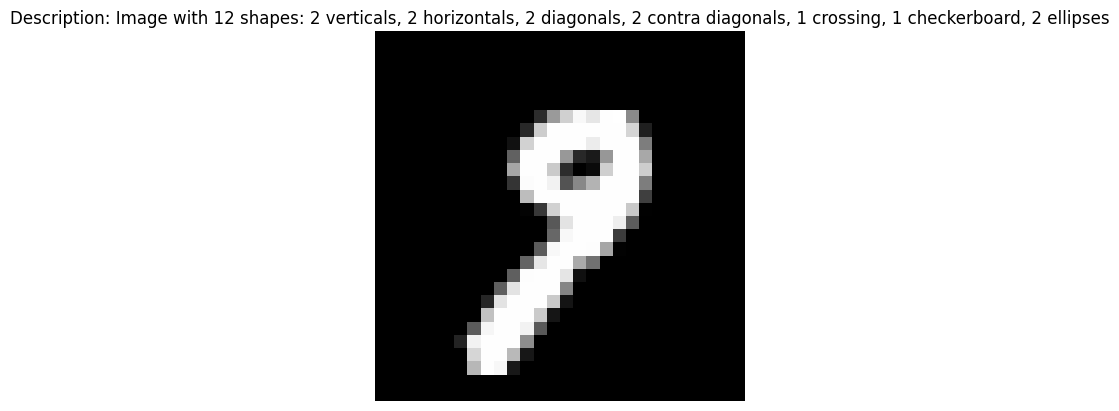

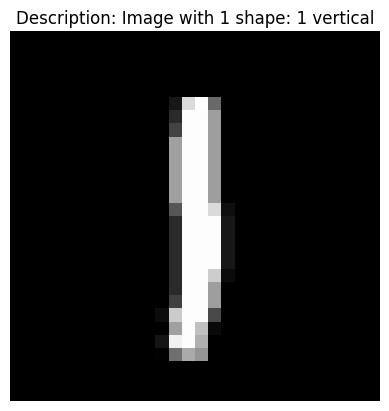

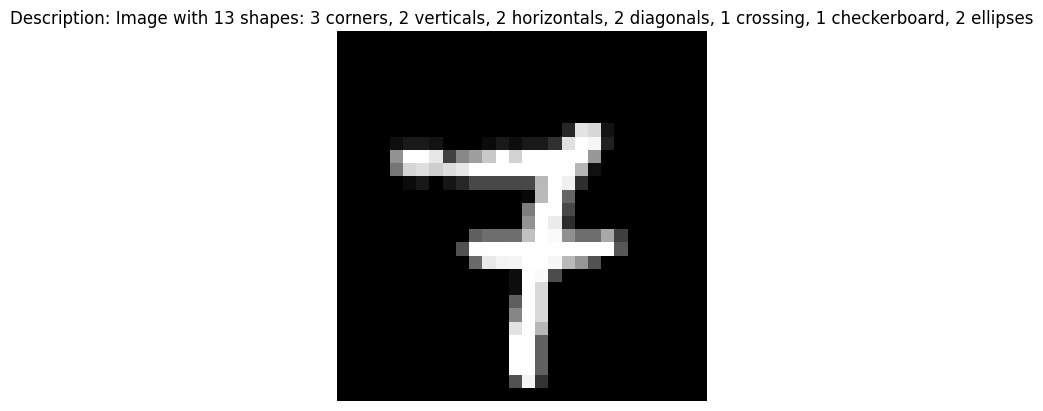

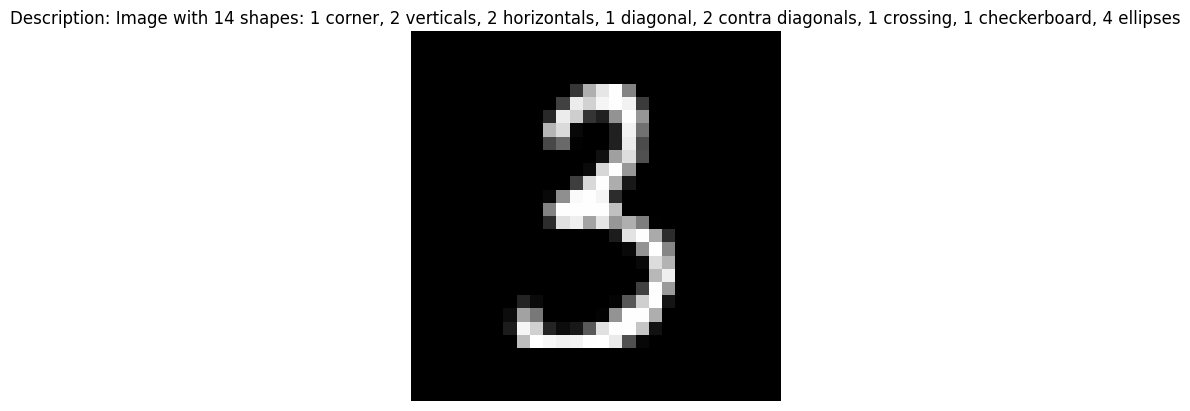

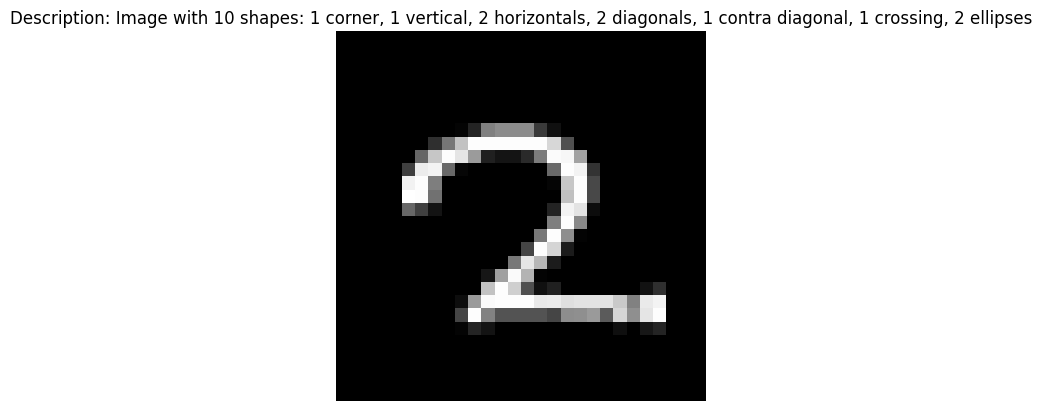

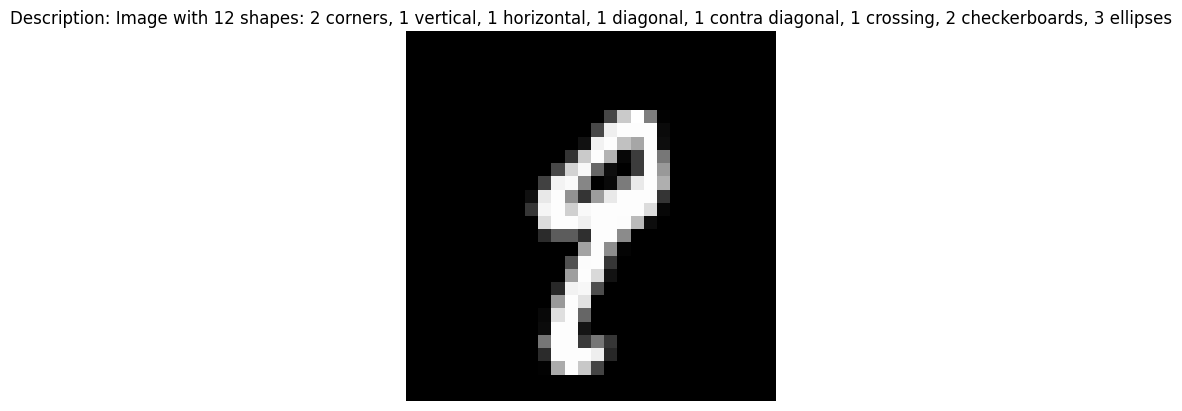

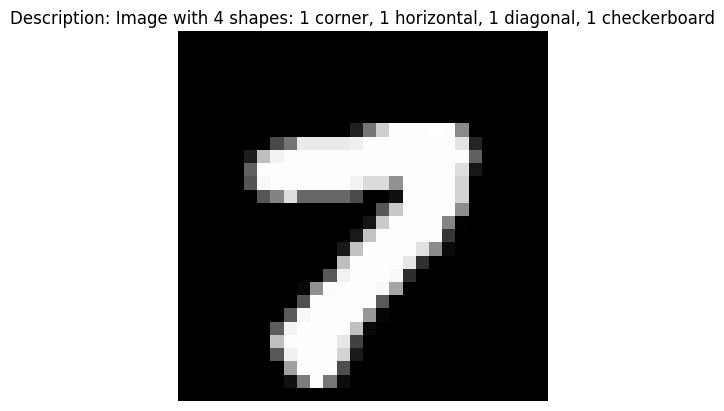

Completed processing batch 4 of 5


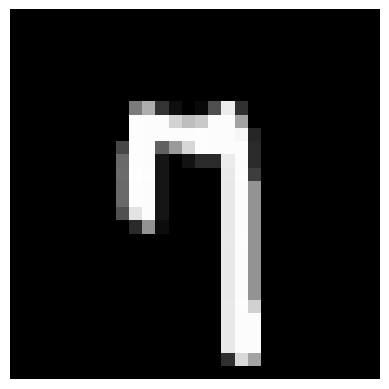

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  0


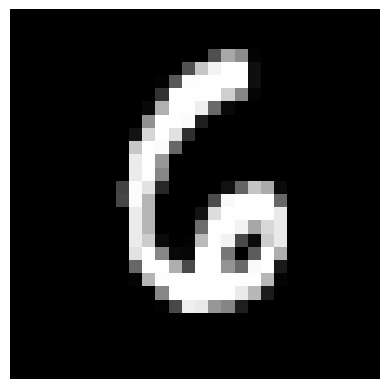

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


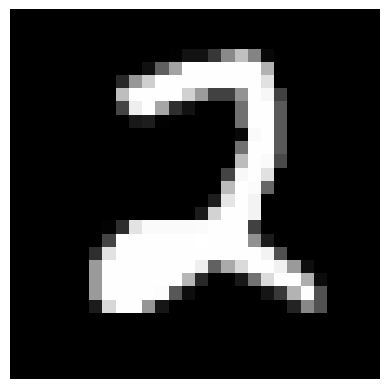

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  2


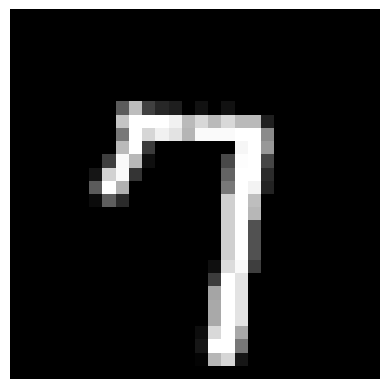

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


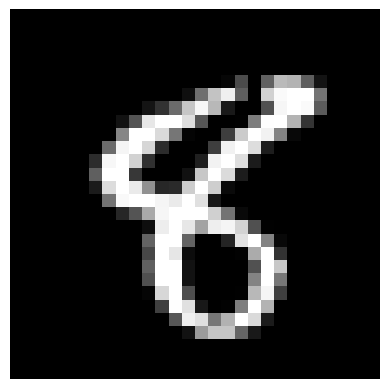

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  3
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  4


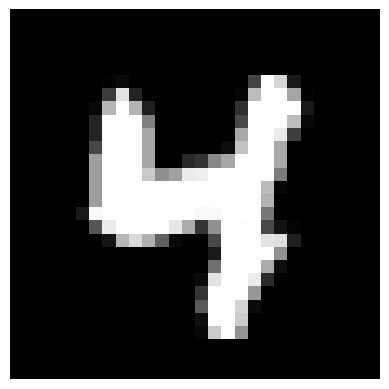

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  3
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


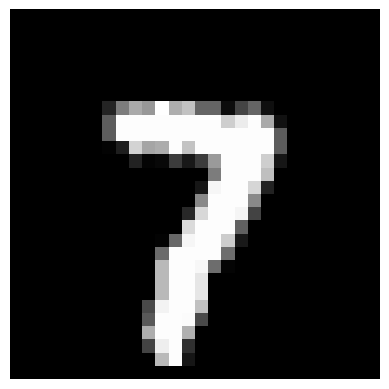

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  0


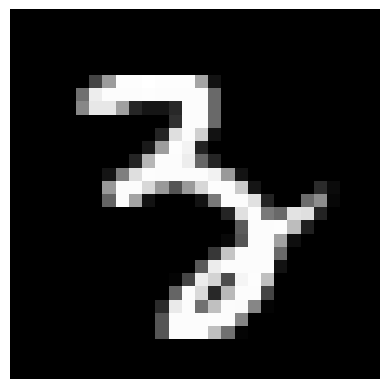

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  4
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  2
Enter count for num_checkerboard (or type 'back' to revise previous):  4
Enter count for num_ellipse (or type 'back' to revise previous):  5


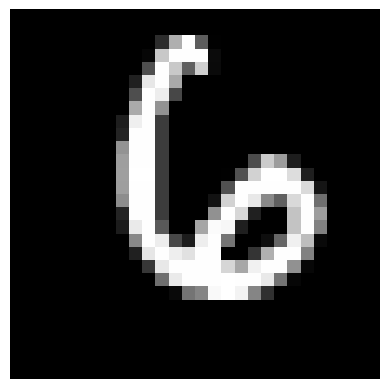

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


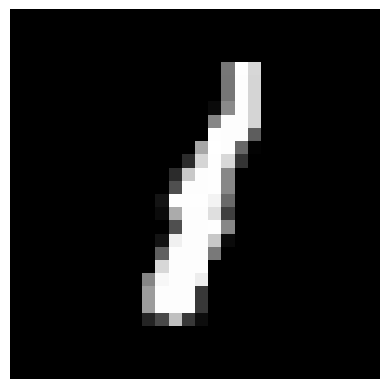

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


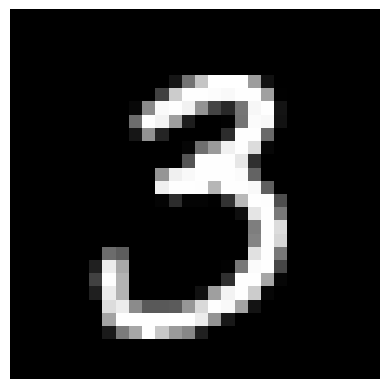

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  back
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  3


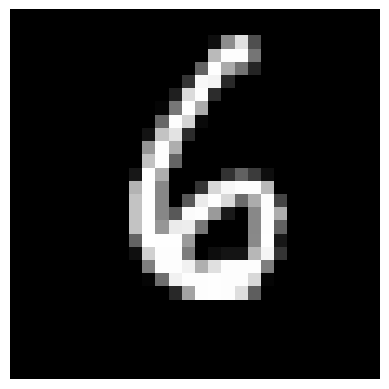

Enter count for num_corner (or type 'back' to revise previous):  3
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  3


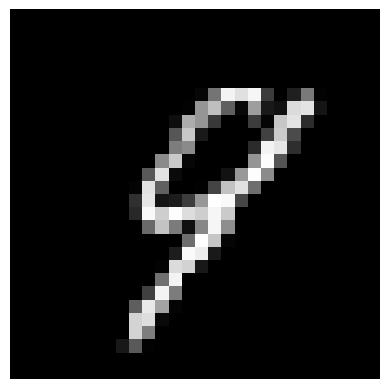

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  3
Enter count for num_ellipse (or type 'back' to revise previous):  3


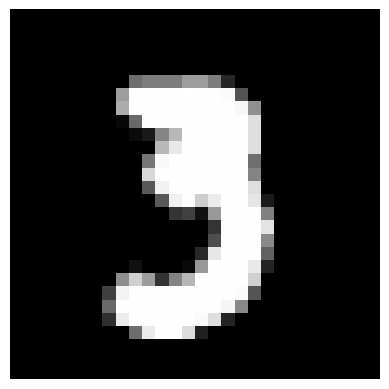

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  back
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  2


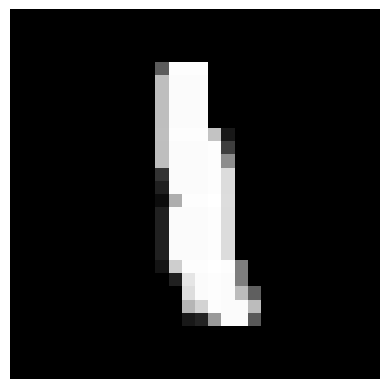

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


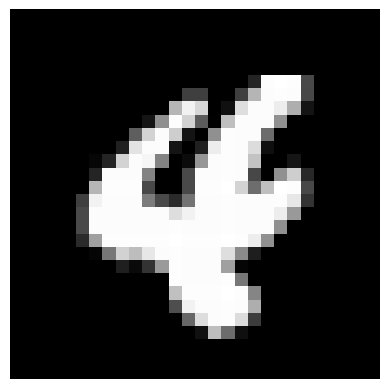

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  0
Enter count for num_horizontal (or type 'back' to revise previous):  1
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  3
Enter count for num_ellipse (or type 'back' to revise previous):  3


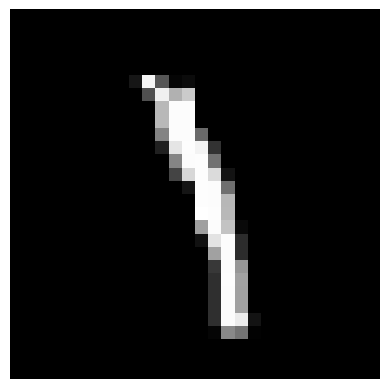

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  1
Enter count for num_horizontal (or type 'back' to revise previous):  0
Enter count for num_diagonal (or type 'back' to revise previous):  0
Enter count for num_contra_diagonal (or type 'back' to revise previous):  1
Enter count for num_crossing (or type 'back' to revise previous):  0
Enter count for num_checkerboard (or type 'back' to revise previous):  0
Enter count for num_ellipse (or type 'back' to revise previous):  0


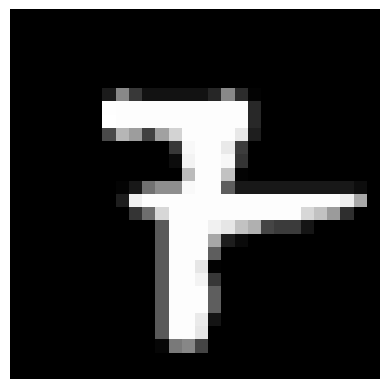

Enter count for num_corner (or type 'back' to revise previous):  2
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  1
Enter count for num_contra_diagonal (or type 'back' to revise previous):  0
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  1


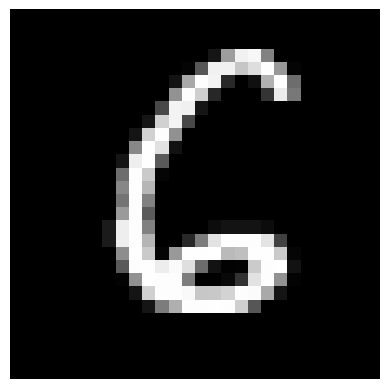

Enter count for num_corner (or type 'back' to revise previous):  0
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  3
Enter count for num_diagonal (or type 'back' to revise previous):  3
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  2
Enter count for num_ellipse (or type 'back' to revise previous):  3


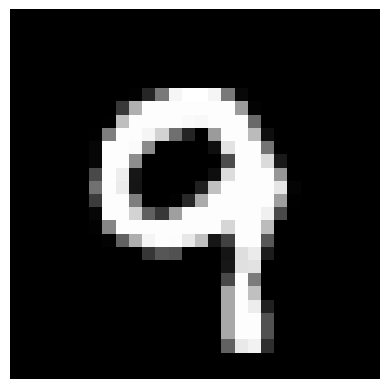

Enter count for num_corner (or type 'back' to revise previous):  1
Enter count for num_vertical (or type 'back' to revise previous):  2
Enter count for num_horizontal (or type 'back' to revise previous):  2
Enter count for num_diagonal (or type 'back' to revise previous):  2
Enter count for num_contra_diagonal (or type 'back' to revise previous):  2
Enter count for num_crossing (or type 'back' to revise previous):  1
Enter count for num_checkerboard (or type 'back' to revise previous):  1
Enter count for num_ellipse (or type 'back' to revise previous):  2


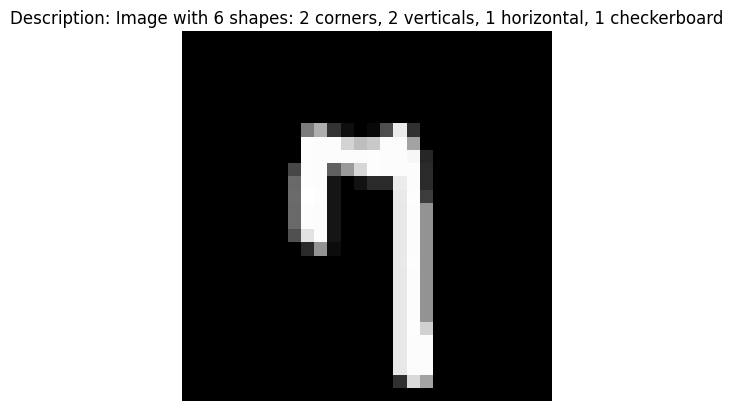

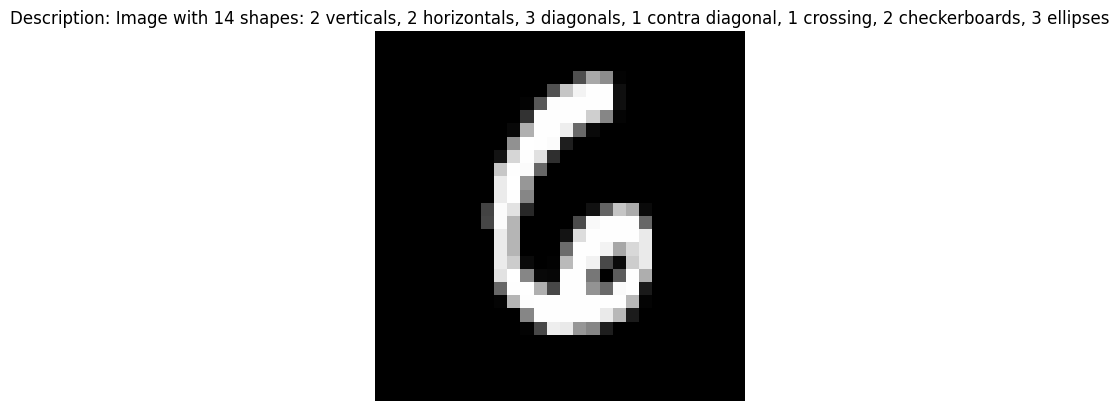

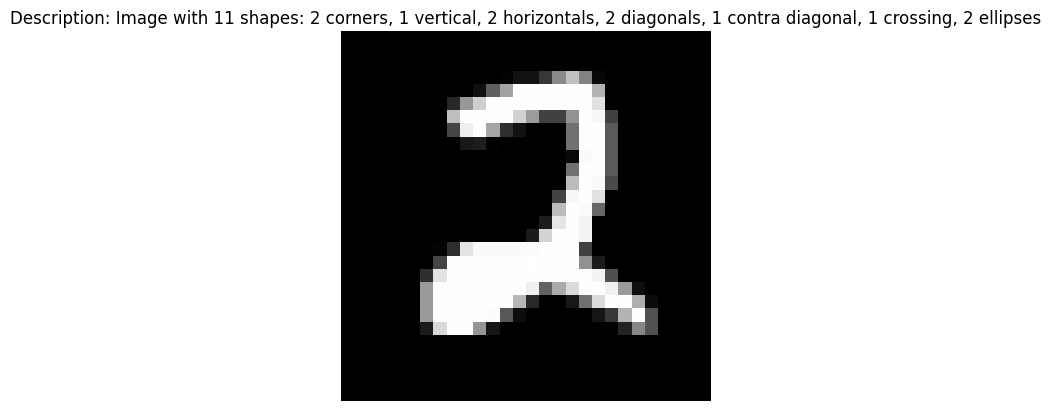

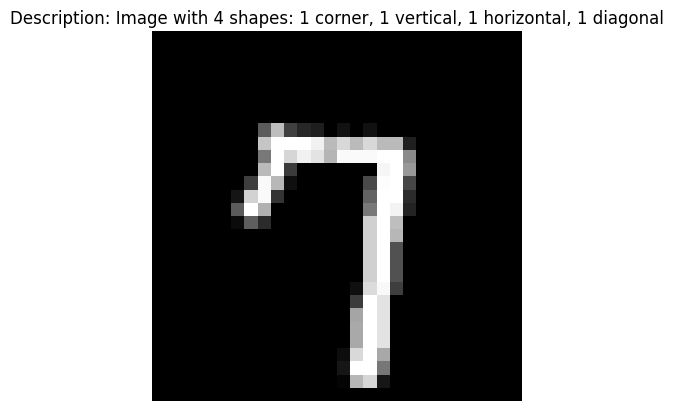

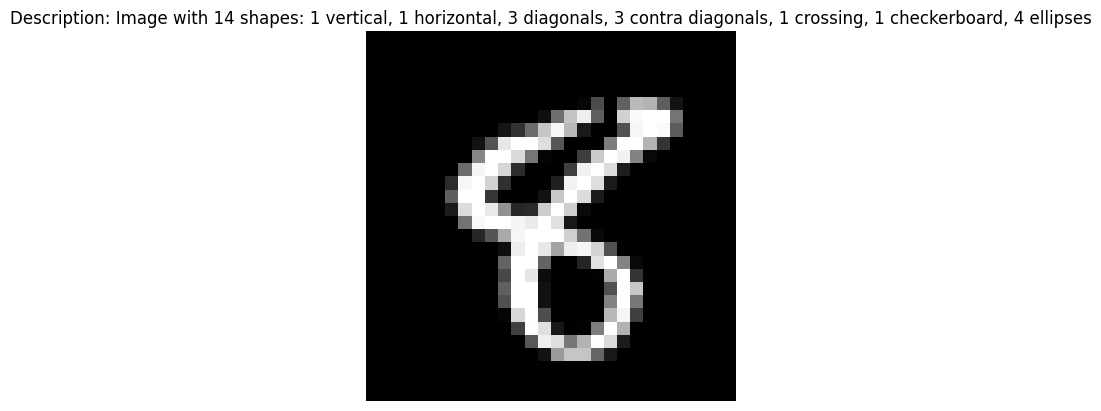

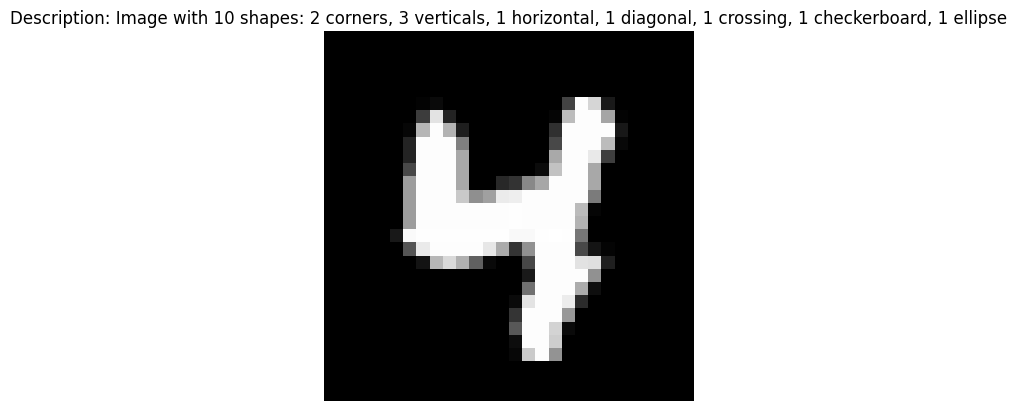

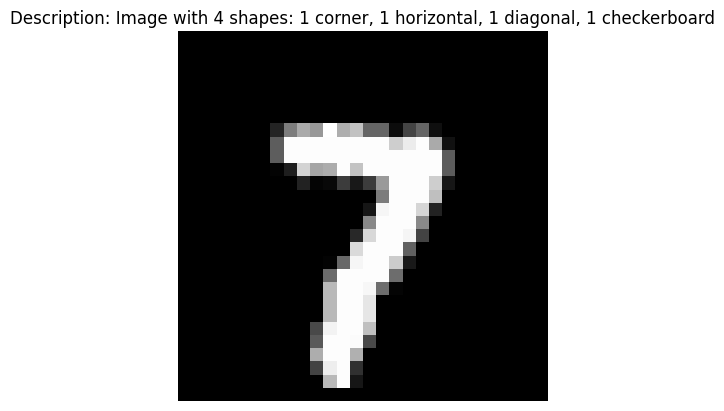

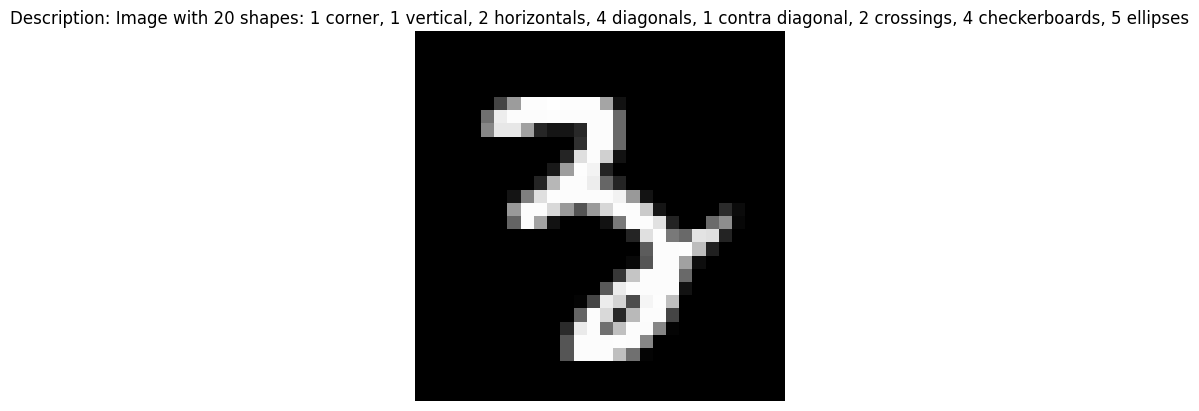

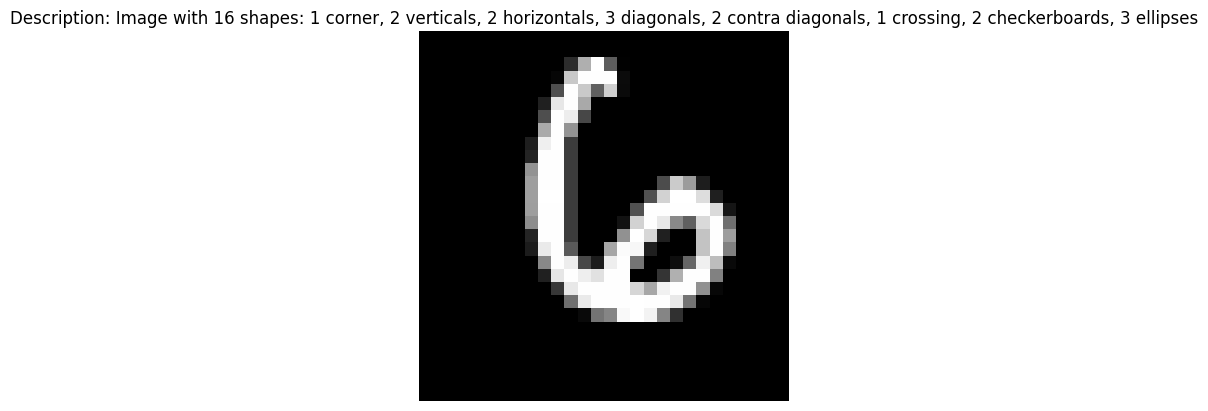

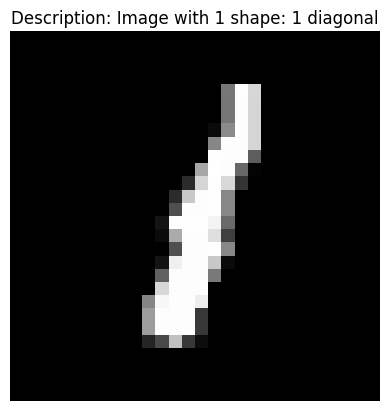

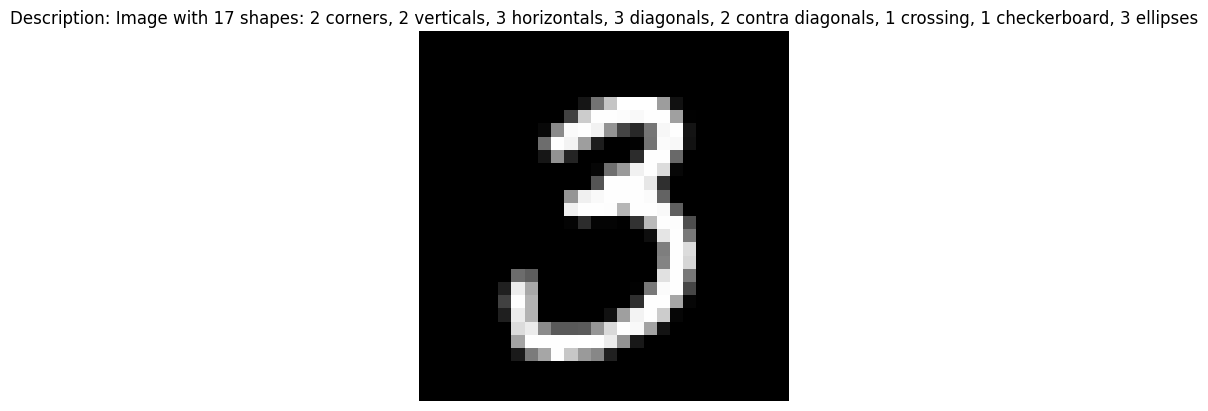

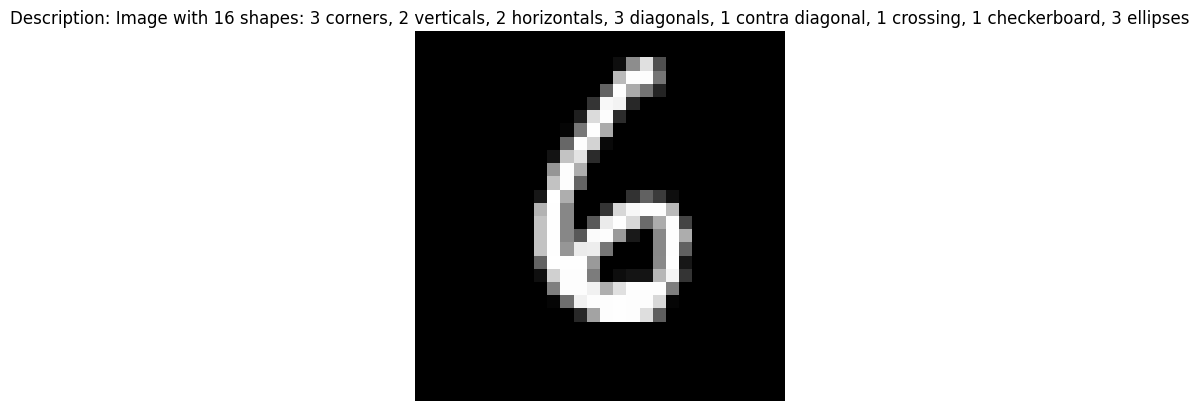

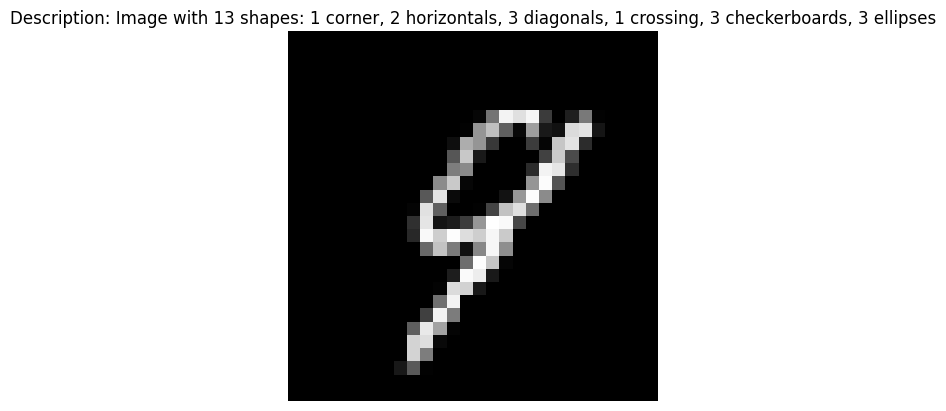

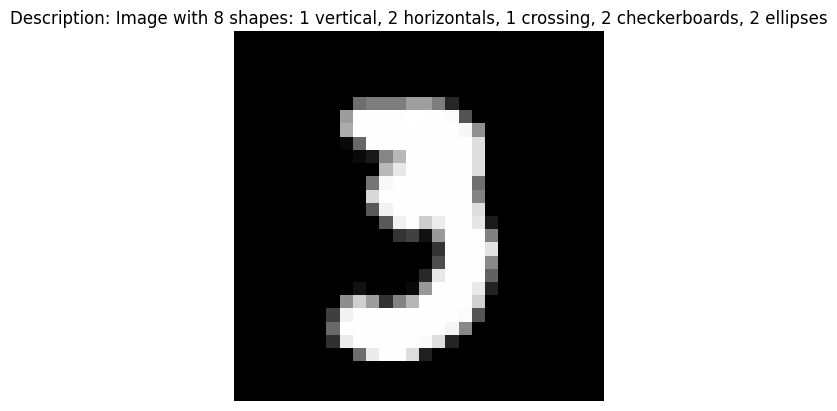

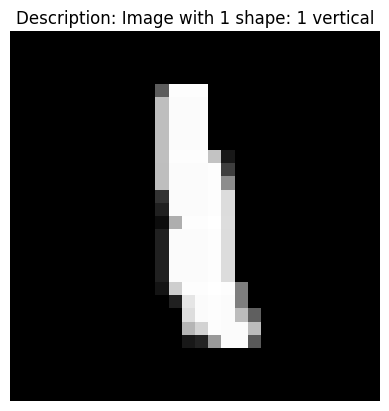

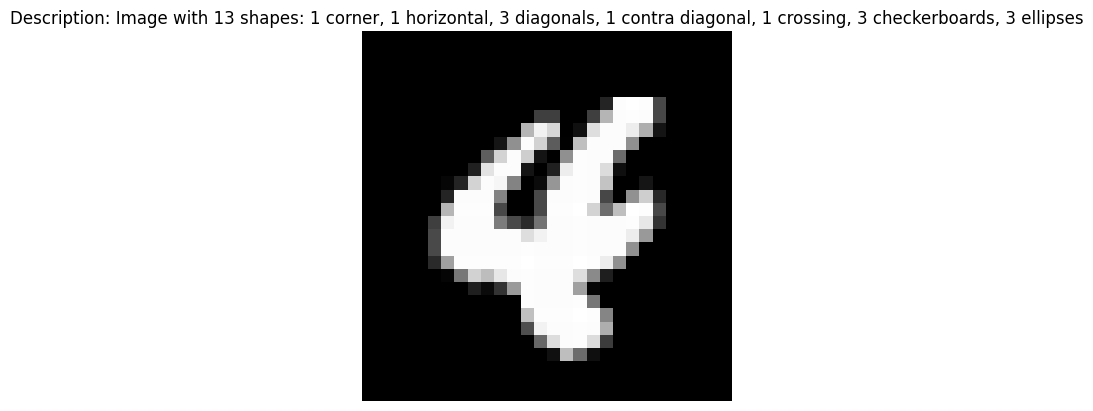

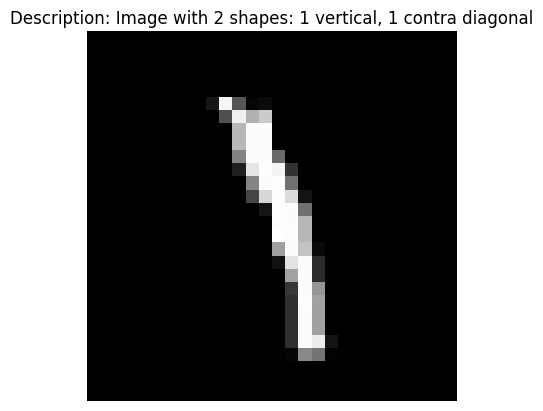

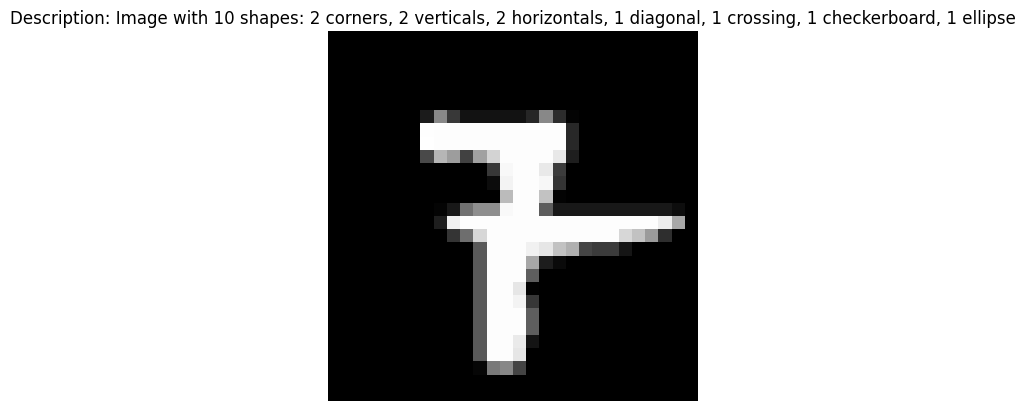

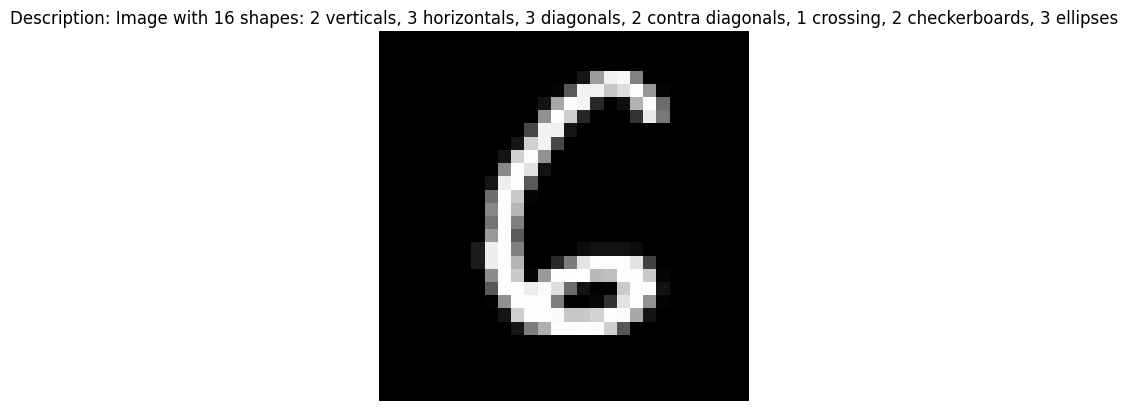

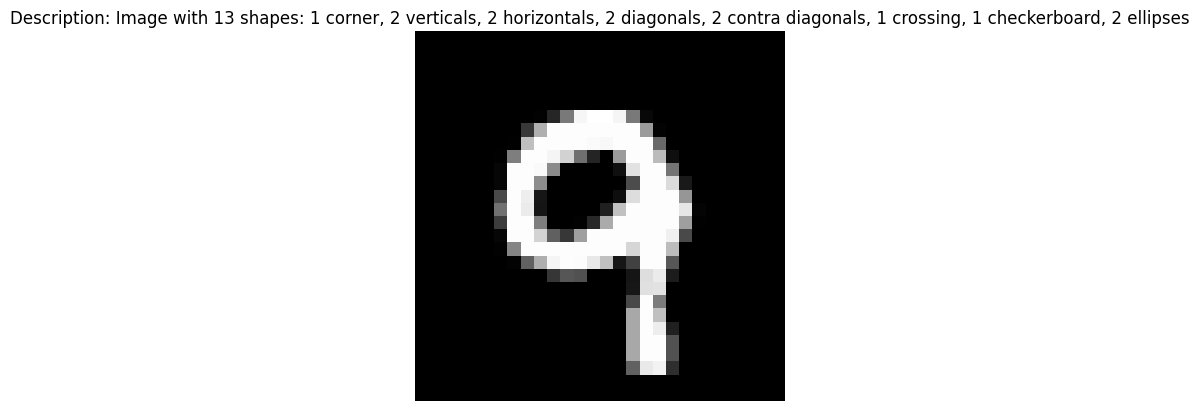

Completed processing batch 5 of 5
Total number of processed images: 100


In [20]:
def process_batch(images, start_index, batch_size):
    # Calculate end index, ensuring it doesn't exceed the length of 'images'
    end_index = min(start_index + batch_size, len(images))
    
    # Process the batch of images from start_index to end_index
    batch_images, batch_annotations = annotate_mnist_images(images[start_index:end_index], end_index - start_index)
    return batch_images, batch_annotations

# Initialize lists to store all processed images and annotations
all_processed_images = []
all_annotations = []

batch_size = 20
# Calculate the number of batches; accounts for the last batch being potentially smaller
num_batches = (len(images) + batch_size - 1) // batch_size

for batch in range(num_batches):
    start_index = batch * batch_size
    batch_images, batch_annotations = process_batch(images, start_index, batch_size)

    # Append the processed batch to the overall lists
    all_processed_images.extend(batch_images)
    all_annotations.extend(batch_annotations)

    # Display the images and their annotations for this batch
    for img, annotation in zip(batch_images, batch_annotations):
        plt.imshow(img.numpy().squeeze(), cmap='gray')
        plt.axis('off')
        plt.title(f"Description: {annotation}")
        plt.show()

    # Print a message after processing each batch
    print(f"Completed processing batch {batch + 1} of {num_batches}")

# Final check to confirm the total number of processed images
print(f"Total number of processed images: {len(all_processed_images)}")


Now we also construct a data set to evaluate the output of the mistral model and see how it describes the images.

For later reuse, we save the images and annotations. 

In [23]:
# Save processed images to a file in the current directory
images_file = "first_100_testset_images.pkl"
annotations_file = "first_100_testset_manual_annotations.pkl"

with open(images_file, 'wb') as file:
    pickle.dump(all_processed_images, file)

# Save annotations to a file in the current directory
with open(annotations_file, 'wb') as file:
    pickle.dump(all_annotations, file)


To ensure that our work is safely stored as expected we load the first stored image and its annotation and display it. 

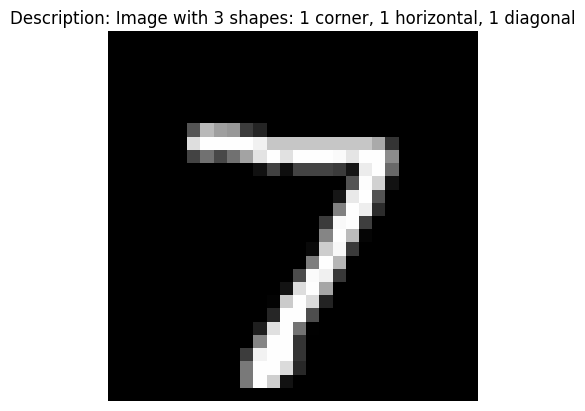

In [27]:
# Load the processed images and annotations from the files
with open('first_100_testset_images.pkl', 'rb') as file:
    loaded_images = pickle.load(file)
with open('first_100_testset_manual_annotations.pkl', 'rb') as file:
    loaded_annotations = pickle.load(file)

# Display the first image and its annotation
first_image = np.squeeze(loaded_images[0])  # Remove the single-dimensional entry from the shape
plt.imshow(first_image, cmap='gray')
plt.axis('off')
plt.title(f"Description: {loaded_annotations[0]}")
plt.show()